In [30]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.8
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.8_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.8.csv", delimiter=" ")

print(menor.shape,list_of_x0.shape)

menor1 = menor[:3944]
menor2 = menor[4237:]

list1 = list_of_x0[:3944]
list2 = list_of_x0[4237:]

print(list1.shape,list2.shape)

menor=np.vstack((menor1,menor2))
list_of_x0=np.hstack((list1,list2))

print(menor.shape)

(7938, 4) (50000,)
(3944,) (45763,)
(7645, 4)


In [31]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [32]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

0 test error: 0.002329339459368289
1 test error: 0.0020192409361034233
2 test error: 0.001724113900670739


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarni

3 test error: 0.001017547664530491
4 test error: 0.0009844006314862401
5 test error: 0.0016628584824520784
6 test error: 0.0014782847868511958
7 test error: 0.0020577393093372683
8 test error: 0.0006418533236936101
9 test error: 0.0007491880188012887
10 test error: 0.0011314799690524584
11 test error: 0.001342420507284875
12 test error: 0.0010813512667579074
13 test error: 0.0012638154344720423
14 test error: 0.0008641645770077076
15 test error: 0.0017446967079615223
16 test error: 0.0006620138809818336
17 test error: 0.0011759251702575634
18 test error: 0.0009003412250511428
19 test error: 0.0009180862933849853
20 test error: 0.0013207681507108186
21 test error: 0.0014696020039202398
22 test error: 0.0004531149520644221
23 test error: 0.0006135463485325735
24 test error: 0.0008594535652540664
25 test error: 0.0005365478954008925
26 test error: 0.0009128874766912683
27 test error: 0.0013882460551245656
28 test error: 0.0008529468352991373
29 test error: 0.0011979886532192305
30 test er

223 test error: 0.0005627768936058904
224 test error: 0.001711526554422606
225 test error: 0.001083080857167998
226 test error: 0.000741333302815356
227 test error: 0.0007110211116762851
228 test error: 0.0006902311243778956
229 test error: 0.000812802793032512
230 test error: 0.0012694975740092673
231 test error: 0.0007707219092328995
232 test error: 0.0008092526708184458
233 test error: 0.0008192069845920396
234 test error: 0.0010221187570556844
235 test error: 0.0008641823253767783
236 test error: 0.0007820174169734887
237 test error: 0.0009580555898689999
238 test error: 0.0009472192576154048
239 test error: 0.0009216937472447044
240 test error: 0.0007806880155751536
241 test error: 0.001581261360838144
242 test error: 0.0011363535921184236
243 test error: 0.001559154803433554
244 test error: 0.0019650996012426218
245 test error: 0.000844131536371278
246 test error: 0.001270813373870063
247 test error: 0.0008675289333024797
248 test error: 0.0008863309810991504
249 test error: 0.00

442 test error: 0.0017226176764669162
443 test error: 0.0009851143267596875
444 test error: 0.0010060527447336494
445 test error: 0.0007287896685837762
446 test error: 0.0008380251851601351
447 test error: 0.001022597879062163
448 test error: 0.0010902591708885658
449 test error: 0.0009376249422363126
450 test error: 0.0006872683709890291
451 test error: 0.001261315224521512
452 test error: 0.0006264507345804426
453 test error: 0.0007745952148664449
454 test error: 0.0009610140267603083
455 test error: 0.0006792199646989587
456 test error: 0.001672989625809657
457 test error: 0.0013875134233404995
458 test error: 0.0007758833176411146
459 test error: 0.0010357180579401016
460 test error: 0.0014872969121466253
461 test error: 0.001127826920326859
462 test error: 0.0006602085623854636
463 test error: 0.0005726066968443491
464 test error: 0.0009353831665568524
465 test error: 0.001724968556263975
466 test error: 0.0011005035333049962
467 test error: 0.001292485857327508
468 test error: 0.

661 test error: 0.0005989797815210849
662 test error: 0.001274611502069355
663 test error: 0.0015278448582668484
664 test error: 0.001330053600795185
665 test error: 0.0010829205990750314
666 test error: 0.0006770698225527453
667 test error: 0.0006701015937792318
668 test error: 0.0022653455943407322
669 test error: 0.0005793307804269318
670 test error: 0.0011636353589849924
671 test error: 0.0009048686335005621
672 test error: 0.0010505694301860614
673 test error: 0.0008634016085673274
674 test error: 0.0008941262279134358
675 test error: 0.0007873387601901609
676 test error: 0.0013384225637326386
677 test error: 0.0008596265000030414
678 test error: 0.0021606466101923394
679 test error: 0.000997696138120445
680 test error: 0.0008842274791834892
681 test error: 0.0008690017344242458
682 test error: 0.0013313702493704404
683 test error: 0.0010814545189063965
684 test error: 0.0008005881714481714
685 test error: 0.0009327525949904448
686 test error: 0.0007993033242862068
687 test error:

878 test error: 0.0011362839451401238
879 test error: 0.00037672430835910246
880 test error: 0.0012367781187246289
881 test error: 0.0007472279541818245
882 test error: 0.001398257163408974
883 test error: 0.0008142817694319841
884 test error: 0.0016749014093847198
885 test error: 0.0015038299066441414
886 test error: 0.0008212749539082121
887 test error: 0.0006485162781910515
888 test error: 0.0008482420181448383
889 test error: 0.000869560848969879
890 test error: 0.0018530314735858676
891 test error: 0.0008444230428805899
892 test error: 0.0017136733166247563
893 test error: 0.0011228420238432995
894 test error: 0.000788103626409188
895 test error: 0.0009223850009124879
896 test error: 0.0009126361273365922
897 test error: 0.0015448408117744292
898 test error: 0.0009142432720521421
899 test error: 0.0008093251214743291
900 test error: 0.0009236903153644062
901 test error: 0.001019902847887086
902 test error: 0.0010627021010152723
903 test error: 0.0004861404884504306
904 test error:

1095 test error: 0.0006626002525767683
1096 test error: 0.0010547618487319471
1097 test error: 0.0012002610663280008
1098 test error: 0.0010647004739745556
1099 test error: 0.0008888920712233129
1100 test error: 0.0007737413725054475
1101 test error: 0.0009293851934583313
1102 test error: 0.0017069463592722038
1103 test error: 0.0009709296851692515
1104 test error: 0.0008993967291076235
1105 test error: 0.001163502312755395
1106 test error: 0.0010450933534389695
1107 test error: 0.001288950348881455
1108 test error: 0.0006975938769836701
1109 test error: 0.0013170046011592052
1110 test error: 0.0008788404889959672
1111 test error: 0.0005016433474503479
1112 test error: 0.0008030093240114352
1113 test error: 0.0010701834577344698
1114 test error: 0.0008956146465271613
1115 test error: 0.0004711411356066805
1116 test error: 0.001439428587796298
1117 test error: 0.0009858726436874912
1118 test error: 0.0018757950816666873
1119 test error: 0.001341254796612512
1120 test error: 0.0009411902

1309 test error: 0.0007982447492132078
1310 test error: 0.0014890889830103066
1311 test error: 0.0007963651245895566
1312 test error: 0.0014568705470128132
1313 test error: 0.0008801004290311795
1314 test error: 0.0006620311333208658
1315 test error: 0.0013115278039735135
1316 test error: 0.0012400274693756496
1317 test error: 0.0013229652233048665
1318 test error: 0.0012597514988300247
1319 test error: 0.001725212023616275
1320 test error: 0.0013439056340823904
1321 test error: 0.0008562501534384214
1322 test error: 0.0014465114387823448
1323 test error: 0.0013856262260418736
1324 test error: 0.0006742641051363602
1325 test error: 0.0013293014214583482
1326 test error: 0.0014788532538463606
1327 test error: 0.0013864597156089942
1328 test error: 0.001145120786974438
1329 test error: 0.002032600122196675
1330 test error: 0.0006332892227534851
1331 test error: 0.0008571988947907184
1332 test error: 0.0007247957256366217
1333 test error: 0.0008565952383324554
1334 test error: 0.002364052

1521 test error: 0.0011376012948184698
1522 test error: 0.0006296179790509494
1523 test error: 0.0011114642878515466
1524 test error: 0.0014247762254569534
1525 test error: 0.0007515559881969812
1526 test error: 0.0007310363459569064
1527 test error: 0.0016203972711508522
1528 test error: 0.0011831469209885985
1529 test error: 0.0011250701609173794
1530 test error: 0.0012647437417006538
1531 test error: 0.001332303229724628
1532 test error: 0.0010864432011246962
1533 test error: 0.001407874953133654
1534 test error: 0.0017314338499767143
1535 test error: 0.001339569529835174
1536 test error: 0.0008425674167376343
1537 test error: 0.0007355858687951086
1538 test error: 0.0013931184103895084
1539 test error: 0.0005364366508850553
1540 test error: 0.0014993321460888506
1541 test error: 0.0015855213001265832
1542 test error: 0.0008854729064668681
1543 test error: 0.0006018750230078125
1544 test error: 0.0011860498892014043
1545 test error: 0.0013312722279245506
1546 test error: 0.001209972

1733 test error: 0.0012148441069619164
1734 test error: 0.0011134302187744624
1735 test error: 0.001258514771100576
1736 test error: 0.0011321405622464107
1737 test error: 0.0011492140621359997
1738 test error: 0.0009644705211836238
1739 test error: 0.0010696499779281868
1740 test error: 0.0008285412895570093
1741 test error: 0.0009668835771263433
1742 test error: 0.001107750822665569
1743 test error: 0.002064191864733832
1744 test error: 0.0012240668162314821
1745 test error: 0.0013272822289090934
1746 test error: 0.0010418907771071403
1747 test error: 0.0015188432249052934
1748 test error: 0.0012414968433907539
1749 test error: 0.0011045073085262337
1750 test error: 0.0010058694051812054
1751 test error: 0.001499121604453164
1752 test error: 0.0006857756764852555
1753 test error: 0.0012602835287100318
1754 test error: 0.001422482694322407
1755 test error: 0.0008045262949836139
1756 test error: 0.001483022915953587
1757 test error: 0.0011102336821999532
1758 test error: 0.001423220547

1946 test error: 0.0009506240027772868
1947 test error: 0.0012867712622674351
1948 test error: 0.0005603067580440584
1949 test error: 0.0015445219573977504
1950 test error: 0.0016202937525944545
1951 test error: 0.0006089818467033268
1952 test error: 0.0006639011892679945
1953 test error: 0.0011505934507834048
1954 test error: 0.0013233169999467514
1955 test error: 0.0012068299041078981
1956 test error: 0.0009309663679741272
1957 test error: 0.001111143810866621
1958 test error: 0.00040415577169068033
1959 test error: 0.0008047277358217639
1960 test error: 0.0010003549483318895
1961 test error: 0.0011722371907327545
1962 test error: 0.0009743951136610363
1963 test error: 0.0008374751839589739
1964 test error: 0.0005547831588756755
1965 test error: 0.0014439330872645147
1966 test error: 0.0010360561068272305
1967 test error: 0.0010682478544700776
1968 test error: 0.0012235842985105
1969 test error: 0.0014289039349521663
1970 test error: 0.0011917010560562238
1971 test error: 0.001761245

2160 test error: 0.0006337456534264534
2161 test error: 0.0018814760071807766
2162 test error: 0.0019373848635073118
2163 test error: 0.0009065328752556873
2164 test error: 0.0008273689633539973
2165 test error: 0.0012210013035068665
2166 test error: 0.0014306328833812258
2167 test error: 0.0014268768960601687
2168 test error: 0.0015063677350745615
2169 test error: 0.0010036419796327666
2170 test error: 0.0010307378854900364
2171 test error: 0.0016968925308689265
2172 test error: 0.0020277367989626487
2173 test error: 0.0014177175990792953
2174 test error: 0.0014341146314637647
2175 test error: 0.0013170301512691908
2176 test error: 0.0012193983556779261
2177 test error: 0.0011485748998100013
2178 test error: 0.0016406925551810108
2179 test error: 0.0009011101739443314
2180 test error: 0.0014113267799207704
2181 test error: 0.0007600724668414103
2182 test error: 0.0006462940335919211
2183 test error: 0.000706471817648592
2184 test error: 0.0007719777616725297
2185 test error: 0.0010074

2373 test error: 0.0009442446698465011
2374 test error: 0.0014057678104880214
2375 test error: 0.0012564672116934866
2376 test error: 0.00101837669576055
2377 test error: 0.000567859356082472
2378 test error: 0.0010794205430080437
2379 test error: 0.0007853376842236399
2380 test error: 0.0011665267489617073
2381 test error: 0.0007135788306543022
2382 test error: 0.0013917305448568331
2383 test error: 0.0014909793235796422
2384 test error: 0.000781300966254971
2385 test error: 0.0005254788036678429
2386 test error: 0.001926011221450709
2387 test error: 0.0016955675647189457
2388 test error: 0.0013303684345527679
2389 test error: 0.0007787040427779986
2390 test error: 0.000767894350904637
2391 test error: 0.0008054646741421851
2392 test error: 0.0012542994592465767
2393 test error: 0.000896047615123929
2394 test error: 0.001740540477049593
2395 test error: 0.0009981148686222206
2396 test error: 0.0010698140222909513
2397 test error: 0.0014941920426813453
2398 test error: 0.00069371023974

2586 test error: 0.0007815273313028194
2587 test error: 0.0006899801304433965
2588 test error: 0.0014266012405282518
2589 test error: 0.001070464601085565
2590 test error: 0.0014001705472005443
2591 test error: 0.0005616003591849354
2592 test error: 0.0011766202709847969
2593 test error: 0.0006028009096485852
2594 test error: 0.0017988929601343063
2595 test error: 0.0010045967342781387
2596 test error: 0.001055075707288471
2597 test error: 0.0008069375246582563
2598 test error: 0.000977527746914316
2599 test error: 0.0007062972168283685
2600 test error: 0.0009171318574937925
2601 test error: 0.0005579060973449025
2602 test error: 0.0013871074088595687
2603 test error: 0.0007445070219247184
2604 test error: 0.0011347709904526808
2605 test error: 0.0011032729860187057
2606 test error: 0.0006809348505139115
2607 test error: 0.0012230412511699765
2608 test error: 0.0009594042872849041
2609 test error: 0.0011291095388751078
2610 test error: 0.0009292698377592582
2611 test error: 0.000649845

2797 test error: 0.001838730434496048
2798 test error: 0.0015091176975661116
2799 test error: 0.0015731781177586999
2800 test error: 0.0010998331722913528
2801 test error: 0.0009428067255325488
2802 test error: 0.0008169881382326008
2803 test error: 0.001175601275485265
2804 test error: 0.0014697722394603244
2805 test error: 0.0009722580373716228
2806 test error: 0.001545691157699259
2807 test error: 0.0009361432147402265
2808 test error: 0.0007900969654466153
2809 test error: 0.0012105755905043021
2810 test error: 0.0013657230180623148
2811 test error: 0.0012778850618690876
2812 test error: 0.0010232417542091975
2813 test error: 0.0018253770846915715
2814 test error: 0.0007319006404410277
2815 test error: 0.0014552417424683387
2816 test error: 0.0005752234948686685
2817 test error: 0.0011410290732828871
2818 test error: 0.0012280760998226376
2819 test error: 0.0013423559020750255
2820 test error: 0.0013006804679058376
2821 test error: 0.0009026005267750252
2822 test error: 0.001072214

3010 test error: 0.0008193797957523369
3011 test error: 0.0009561523984688267
3012 test error: 0.001014462965197809
3013 test error: 0.0015466298953200213
3014 test error: 0.0009825668481916558
3015 test error: 0.0012688069513134813
3016 test error: 0.002016376390569926
3017 test error: 0.0007558679304301893
3018 test error: 0.0011285761757400027
3019 test error: 0.0012294756887246102
3020 test error: 0.001315914106042632
3021 test error: 0.0005601123504687409
3022 test error: 0.0012546302157590093
3023 test error: 0.0012309441879056289
3024 test error: 0.001388240114431471
3025 test error: 0.0020479737474290442
3026 test error: 0.0004482809898247942
3027 test error: 0.0007433054272572
3028 test error: 0.0005957326888516012
3029 test error: 0.000952913414520807
3030 test error: 0.0016081208791000336
3031 test error: 0.0007961167145491099
3032 test error: 0.0010882852118859901
3033 test error: 0.001450537247957515
3034 test error: 0.0015330288536597454
3035 test error: 0.001161488511299

3221 test error: 0.0011020785672788643
3222 test error: 0.0010131254009384627
3223 test error: 0.0009576378141810892
3224 test error: 0.0006250290984870899
3225 test error: 0.0016695031923170233
3226 test error: 0.0011531722025806775
3227 test error: 0.0013582243154460342
3228 test error: 0.0015003679431663931
3229 test error: 0.0011042161008974892
3230 test error: 0.0012427067265496179
3231 test error: 0.0006393068545887092
3232 test error: 0.0008559678048625138
3233 test error: 0.001918380197044522
3234 test error: 0.0009651985246270557
3235 test error: 0.0017465099962751106
3236 test error: 0.0005287226840055306
3237 test error: 0.001780712787111729
3238 test error: 0.001138388200972862
3239 test error: 0.0009032406369248947
3240 test error: 0.0008589090994655188
3241 test error: 0.0007095666329002815
3242 test error: 0.0011569030995361776
3243 test error: 0.0006763106391200062
3244 test error: 0.001381528144335043
3245 test error: 0.0010169932925452815
3246 test error: 0.0010820060

3435 test error: 0.0007850202493157658
3436 test error: 0.0005417608021483631
3437 test error: 0.0014733800943988842
3438 test error: 0.0015037327949772234
3439 test error: 0.001086204136849788
3440 test error: 0.0006154523079222385
3441 test error: 0.0012408270047833325
3442 test error: 0.0012140027333523735
3443 test error: 0.0013368442073294217
3444 test error: 0.0012145249333990553
3445 test error: 0.0011738799447309808
3446 test error: 0.0008246382464857556
3447 test error: 0.0006491098039289878
3448 test error: 0.0006435907276698905
3449 test error: 0.000813637695012132
3450 test error: 0.001377463518458071
3451 test error: 0.000490853174837962
3452 test error: 0.000499725735589663
3453 test error: 0.0007571783001807882
3454 test error: 0.0011102276157686271
3455 test error: 0.0013518789646809566
3456 test error: 0.0009578610252875612
3457 test error: 0.0009392219624134899
3458 test error: 0.0018793457238541447
3459 test error: 0.0009144578271369868
3460 test error: 0.00114378811

3647 test error: 0.0007290738662114506
3648 test error: 0.0006978379013819254
3649 test error: 0.0011013526859389537
3650 test error: 0.0011955688669240518
3651 test error: 0.0010072790310129969
3652 test error: 0.000986843668014757
3653 test error: 0.0012040220137061605
3654 test error: 0.0005766328917596665
3655 test error: 0.00047684541524855293
3656 test error: 0.0015878687943914882
3657 test error: 0.0007007648236872613
3658 test error: 0.0013935862423228326
3659 test error: 0.0009023963797967507
3660 test error: 0.0014928420741785815
3661 test error: 0.001164339080714663
3662 test error: 0.0009834752457115923
3663 test error: 0.0008643806306557403
3664 test error: 0.0008746340114686906
3665 test error: 0.0008307041136016263
3666 test error: 0.0008573375324088392
3667 test error: 0.003738777872836357
3668 test error: 0.0009556165199148558
3669 test error: 0.0011769597426273138
3670 test error: 0.0015867662026316667
3671 test error: 0.0017292955351002276
3672 test error: 0.00158829

3859 test error: 0.0014944019139121099
3860 test error: 0.001270901282311521
3861 test error: 0.0013479484754080012
3862 test error: 0.001163355777915438
3863 test error: 0.0009599198449456538
3864 test error: 0.0014639066644417029
3865 test error: 0.0016730494986192733
3866 test error: 0.0004951630353785968
3867 test error: 0.0012361854668400656
3868 test error: 0.0009592096005699419
3869 test error: 0.000920593527766598
3870 test error: 0.0019663131588732795
3871 test error: 0.0013090009458576227
3872 test error: 0.0011001199543042785
3873 test error: 0.001058769388520754
3874 test error: 0.0013967650372839649
3875 test error: 0.001123190908830906
3876 test error: 0.0009658748873828739
3877 test error: 0.0012318858963479271
3878 test error: 0.0012016843127933036
3879 test error: 0.0010506903423577105
3880 test error: 0.0009693742862545697
3881 test error: 0.001038766463817849
3882 test error: 0.0005283258522338441
3883 test error: 0.0017972745713685178
3884 test error: 0.001811496000

4072 test error: 0.0009056435012891607
4073 test error: 0.0013649338865377011
4074 test error: 0.0010628518696247007
4075 test error: 0.0007776888517445497
4076 test error: 0.00045680139416702157
4077 test error: 0.0006035089559281138
4078 test error: 0.0016040565570096964
4079 test error: 0.0012385578294885004
4080 test error: 0.0009978445001952122
4081 test error: 0.0016845842705449203
4082 test error: 0.0009743188563750873
4083 test error: 0.002184408106722388
4084 test error: 0.0008850049534631932
4085 test error: 0.0007593750416348573
4086 test error: 0.0016689553811651558
4087 test error: 0.0012043843496649738
4088 test error: 0.0009145676108241682
4089 test error: 0.0007867214253844896
4090 test error: 0.0005715398712661747
4091 test error: 0.0006341260440923274
4092 test error: 0.0013456617125914615
4093 test error: 0.0014908658157837822
4094 test error: 0.000936372884941282
4095 test error: 0.0008744936253176466
4096 test error: 0.0009499602459705994
4097 test error: 0.0005770

4286 test error: 0.0008914103946249138
4287 test error: 0.0008413829195765579
4288 test error: 0.0006571042575437331
4289 test error: 0.0013178794375816871
4290 test error: 0.0013343015923455441
4291 test error: 0.0012367903930332314
4292 test error: 0.0007557383692965181
4293 test error: 0.0008817484735135644
4294 test error: 0.001228414815203978
4295 test error: 0.0010373687396334097
4296 test error: 0.0014062785517213597
4297 test error: 0.0007518572510697281
4298 test error: 0.0005134369953230632
4299 test error: 0.0017267202155146185
4300 test error: 0.001062699726056972
4301 test error: 0.001988866313310046
4302 test error: 0.000954647462201783
4303 test error: 0.001631357089725665
4304 test error: 0.0010094501971995827
4305 test error: 0.001006749360686821
4306 test error: 0.001073623998905977
4307 test error: 0.0004819776211877833
4308 test error: 0.0008620171082186982
4309 test error: 0.0010633483916997473
4310 test error: 0.0016718212984147987
4311 test error: 0.0011355523367

4500 test error: 0.0012910451175861108
4501 test error: 0.002303745720625645
4502 test error: 0.0017103250574355185
4503 test error: 0.000999548758239988
4504 test error: 0.0006857647366209173
4505 test error: 0.0012142554688998471
4506 test error: 0.0010539277044768899
4507 test error: 0.0016385564789325932
4508 test error: 0.000934741022745026
4509 test error: 0.001085397753724683
4510 test error: 0.0008710088784221688
4511 test error: 0.001560599812599148
4512 test error: 0.0013465709098648873
4513 test error: 0.0014696639231489097
4514 test error: 0.0011566740921619234
4515 test error: 0.0016070627232213847
4516 test error: 0.0011053012070089858
4517 test error: 0.0016467085234728998
4518 test error: 0.002262749878852937
4519 test error: 0.0005935351119401409
4520 test error: 0.0014276516671646096
4521 test error: 0.0008317610934598865
4522 test error: 0.0014625536608642144
4523 test error: 0.0010112425093776734
4524 test error: 0.0012345837630658954
4525 test error: 0.001189598332

4712 test error: 0.0012417473470402423
4713 test error: 0.0009123944359757124
4714 test error: 0.0016172179900366937
4715 test error: 0.0007464849827574382
4716 test error: 0.0005710999412080382
4717 test error: 0.000984142824703463
4718 test error: 0.0008590195157362507
4719 test error: 0.0017974209882939743
4720 test error: 0.000740915606134132
4721 test error: 0.001143285178315496
4722 test error: 0.0010207169872224998
4723 test error: 0.0005193758929292254
4724 test error: 0.0017218358823577612
4725 test error: 0.0006877059054424818
4726 test error: 0.0014740652797464557
4727 test error: 0.001387095032281243
4728 test error: 0.001341438794865936
4729 test error: 0.0011954644431566412
4730 test error: 0.0006022312130274292
4731 test error: 0.0009653767251327671
4732 test error: 0.001479961248926194
4733 test error: 0.0010013506452832752
4734 test error: 0.0013177493834135609
4735 test error: 0.0017874681956968584
4736 test error: 0.0009924364018043127
4737 test error: 0.000851726399

4925 test error: 0.0005221666302825482
4926 test error: 0.0005761577659795939
4927 test error: 0.000724783653602092
4928 test error: 0.0010808583854484185
4929 test error: 0.0007365973827438062
4930 test error: 0.0010797700469389357
4931 test error: 0.000918177846556793
4932 test error: 0.0014276532832464151
4933 test error: 0.0010878401518795188
4934 test error: 0.001567535713167106
4935 test error: 0.002492037427797738
4936 test error: 0.000939693532015088
4937 test error: 0.0010950987959639903
4938 test error: 0.0008794336215104886
4939 test error: 0.0011137443253229635
4940 test error: 0.0005444608892743126
4941 test error: 0.001310740174995453
4942 test error: 0.0013023329735677121
4943 test error: 0.0005246973055268185
4944 test error: 0.002189156342021148
4945 test error: 0.000643628335059033
4946 test error: 0.0013461204365515379
4947 test error: 0.00132140299316212
4948 test error: 0.000970349940228705
4949 test error: 0.0008744686005810976
4950 test error: 0.00113225534302575

5137 test error: 0.001070189855470617
5138 test error: 0.002691851566214343
5139 test error: 0.0006837381688613894
5140 test error: 0.0011520370936053714
5141 test error: 0.0009197511711671189
5142 test error: 0.0007870865013203819
5143 test error: 0.0007361425661586068
5144 test error: 0.0018580010690277806
5145 test error: 0.001153531503428978
5146 test error: 0.0009225006208341418
5147 test error: 0.0014421615567752637
5148 test error: 0.0012979668311061709
5149 test error: 0.0011132524239691468
5150 test error: 0.001191473520648278
5151 test error: 0.001496580036361936
5152 test error: 0.0009490455494965728
5153 test error: 0.0010557015772512761
5154 test error: 0.0009669606660360656
5155 test error: 0.0009207469043497939
5156 test error: 0.0010844534872551537
5157 test error: 0.0007536016988976257
5158 test error: 0.0014456809327988856
5159 test error: 0.0013530641626937022
5160 test error: 0.0014547060218413248
5161 test error: 0.0009408682871949674
5162 test error: 0.00092100871

5349 test error: 0.0013572942529158675
5350 test error: 0.0007508686605037217
5351 test error: 0.0012191885937608534
5352 test error: 0.0006422993867052149
5353 test error: 0.0009055275879578827
5354 test error: 0.00047661129569581093
5355 test error: 0.000635576828927212
5356 test error: 0.001383783919430176
5357 test error: 0.0017225535796022546
5358 test error: 0.0012207722218515698
5359 test error: 0.0009502424905768601
5360 test error: 0.0010372188001984402
5361 test error: 0.0015031349080280728
5362 test error: 0.0007035675195390991
5363 test error: 0.0008480525342265857
5364 test error: 0.0006881945466882916
5365 test error: 0.0012339435748175579
5366 test error: 0.0007741284550421227
5367 test error: 0.001163510475652345
5368 test error: 0.00042996875960149084
5369 test error: 0.0008562282843949456
5370 test error: 0.0020677994680033123
5371 test error: 0.0010245017403823623
5372 test error: 0.0013678420862051842
5373 test error: 0.0006953498266035323
5374 test error: 0.0012579

5562 test error: 0.0013770551808079251
5563 test error: 0.001274992605482501
5564 test error: 0.0015208542055902628
5565 test error: 0.0006076233991635264
5566 test error: 0.0013357889767531318
5567 test error: 0.0011322860624783286
5568 test error: 0.0019490132417647617
5569 test error: 0.0012833367549403133
5570 test error: 0.00473897227045999
5571 test error: 0.0012593901956686256
5572 test error: 0.0015707760487798114
5573 test error: 0.0013590818157837874
5574 test error: 0.0007713181776416916
5575 test error: 0.0012307940088296765
5576 test error: 0.001189362776336957
5577 test error: 0.001284790998736363
5578 test error: 0.0012073355193229988
5579 test error: 0.001047014212422745
5580 test error: 0.0011888362343972783
5581 test error: 0.0009255976633212546
5582 test error: 0.0006658701716565455
5583 test error: 0.0009956793262398914
5584 test error: 0.002276941179998853
5585 test error: 0.0012189643758801993
5586 test error: 0.0006141967134830093
5587 test error: 0.0006195291624

5774 test error: 0.0011877184817462524
5775 test error: 0.0007824739384436545
5776 test error: 0.0007642243907617882
5777 test error: 0.0012481295807342235
5778 test error: 0.001238595287103344
5779 test error: 0.0013120107097382198
5780 test error: 0.0014670184607323655
5781 test error: 0.0013200263925592364
5782 test error: 0.0014220737095745812
5783 test error: 0.0008587396521403693
5784 test error: 0.0008044448246929969
5785 test error: 0.001026810651669989
5786 test error: 0.0007824380954537858
5787 test error: 0.0012992826616482918
5788 test error: 0.0014860659092776414
5789 test error: 0.0007135664002500344
5790 test error: 0.000907395246062254
5791 test error: 0.0020258141360005016
5792 test error: 0.001337343760960339
5793 test error: 0.002269204282105843
5794 test error: 0.0006609766018648628
5795 test error: 0.0014759807742517515
5796 test error: 0.0014798748065455614
5797 test error: 0.0008454314309994175
5798 test error: 0.0013222360383540698
5799 test error: 0.00144042708

5987 test error: 0.0016598062876321913
5988 test error: 0.001781976471424321
5989 test error: 0.0014140419397951941
5990 test error: 0.00122302027771803
5991 test error: 0.001254816786121511
5992 test error: 0.0012561878198170196
5993 test error: 0.0014748377839709445
5994 test error: 0.0015788005921599272
5995 test error: 0.0011765349891384009
5996 test error: 0.0012768829777306586
5997 test error: 0.0009161371819395164
5998 test error: 0.0014923278886465534
5999 test error: 0.0019197371800292462
6000 test error: 0.0012876550641995389
6001 test error: 0.0018493971993386168
6002 test error: 0.0013105265928016242
6003 test error: 0.0007402991939715062
6004 test error: 0.0007048354555183788
6005 test error: 0.001179205106788803
6006 test error: 0.0013797674987440145
6007 test error: 0.0009078688694520462
6008 test error: 0.003634820496384954
6009 test error: 0.0012877303322086872
6010 test error: 0.0014591411475133869
6011 test error: 0.001326830133884536
6012 test error: 0.0014687438245

6199 test error: 0.0008849855044944891
6200 test error: 0.0008706276263003793
6201 test error: 0.0008299138908843672
6202 test error: 0.0009365607417839916
6203 test error: 0.0010326220847759115
6204 test error: 0.0017129079111442625
6205 test error: 0.0006697047120096365
6206 test error: 0.0009456716646352632
6207 test error: 0.0009569649331633651
6208 test error: 0.0006418806822627998
6209 test error: 0.0010930887675991393
6210 test error: 0.00028524026866508587
6211 test error: 0.0015951930638007472
6212 test error: 0.0011503081081228222
6213 test error: 0.0013591454053945528
6214 test error: 0.0009794927603676588
6215 test error: 0.0007747314515033069
6216 test error: 0.0010244736933681753
6217 test error: 0.0013998319716024689
6218 test error: 0.0011599502771305471
6219 test error: 0.0011188424819449144
6220 test error: 0.0016056880139911204
6221 test error: 0.0013246607700517117
6222 test error: 0.0010311876164911756
6223 test error: 0.0012378080819347187
6224 test error: 0.00075

6411 test error: 0.0013028410560271583
6412 test error: 0.0007457496497382341
6413 test error: 0.0017549915671802331
6414 test error: 0.0021000873441134717
6415 test error: 0.0010095071295689823
6416 test error: 0.0006223823759336503
6417 test error: 0.002209889548673016
6418 test error: 0.0015416430485762835
6419 test error: 0.0013612800437770207
6420 test error: 0.0009912319479060989
6421 test error: 0.001066851245295799
6422 test error: 0.0009919318365798147
6423 test error: 0.0016873185451732504
6424 test error: 0.0012242653053305167
6425 test error: 0.0005223463566908637
6426 test error: 0.001149728443898757
6427 test error: 0.0010352213794085682
6428 test error: 0.0009355916253980046
6429 test error: 0.0008894264042447711
6430 test error: 0.000823659418599335
6431 test error: 0.0009759604796843731
6432 test error: 0.0006288764967514241
6433 test error: 0.0008790739440662094
6434 test error: 0.0016614854078158727
6435 test error: 0.0012595476473318303
6436 test error: 0.0009835430

6625 test error: 0.0013271629424490318
6626 test error: 0.0010606665574610203
6627 test error: 0.000878472358082361
6628 test error: 0.0017486948486810008
6629 test error: 0.0009622278022320546
6630 test error: 0.0015083841891185585
6631 test error: 0.001563954977147197
6632 test error: 0.0016810454703321263
6633 test error: 0.0012290165373128126
6634 test error: 0.000950574585306545
6635 test error: 0.0006434467988095138
6636 test error: 0.0008743034787768586
6637 test error: 0.0012128497503510905
6638 test error: 0.0013458900989509672
6639 test error: 0.0006425067054392131
6640 test error: 0.0006816104411181113
6641 test error: 0.0009728182990748746
6642 test error: 0.000589097662814192
6643 test error: 0.0011474069132253791
6644 test error: 0.0012586526415275584
6645 test error: 0.0016833747486631509
6646 test error: 0.0013108653060491073
6647 test error: 0.0008555792578797222
6648 test error: 0.0006119236158034837
6649 test error: 0.0009017337314684498
6650 test error: 0.0014396070

6836 test error: 0.0011053043989678092
6837 test error: 0.000433567386461152
6838 test error: 0.0008078344633200287
6839 test error: 0.001140739210754543
6840 test error: 0.0006654890512832217
6841 test error: 0.0014122079745796522
6842 test error: 0.0012327614475989566
6843 test error: 0.0010154186981063905
6844 test error: 0.0012509773666607006
6845 test error: 0.0009742360717762662
6846 test error: 0.0014878962721882702
6847 test error: 0.0011797414075754218
6848 test error: 0.0010919655330427034
6849 test error: 0.0013366483505190888
6850 test error: 0.0017538149451886522
6851 test error: 0.0017974840206757257
6852 test error: 0.0013093753156429326
6853 test error: 0.0007076435584199695
6854 test error: 0.0015426257270918092
6855 test error: 0.0013969277377312867
6856 test error: 0.0006504174278007955
6857 test error: 0.0008307957233865221
6858 test error: 0.001045979363708474
6859 test error: 0.0012055270722468616
6860 test error: 0.0009975713026226355
6861 test error: 0.001178860

7048 test error: 0.0013015893814030154
7049 test error: 0.000822753902675794
7050 test error: 0.001055595169324733
7051 test error: 0.0010644751800856706
7052 test error: 0.0008053901670253345
7053 test error: 0.0012103004595805614
7054 test error: 0.0012916637935426003
7055 test error: 0.0016026333961778644
7056 test error: 0.0006995214631468394
7057 test error: 0.0013467563194446371
7058 test error: 0.0012282468326619816
7059 test error: 0.0005177909047457649
7060 test error: 0.0005624374556728177
7061 test error: 0.00129502866596422
7062 test error: 0.0007584629078132153
7063 test error: 0.000585197645698646
7064 test error: 0.0007426279510011757
7065 test error: 0.002036050259402945
7066 test error: 0.0014854606244727097
7067 test error: 0.0012182646976265808
7068 test error: 0.0015688788702869975
7069 test error: 0.0016079933807556907
7070 test error: 0.0009288664906069874
7071 test error: 0.0009958770271485647
7072 test error: 0.0004523110494329017
7073 test error: 0.001380316328

7261 test error: 0.0006721113937562755
7262 test error: 0.0008836266196578158
7263 test error: 0.0011752417104770219
7264 test error: 0.0011682454310622036
7265 test error: 0.0008272932587614133
7266 test error: 0.0007996930407024337
7267 test error: 0.0011821761731015835
7268 test error: 0.0014017379966184853
7269 test error: 0.000728488147554061
7270 test error: 0.00082297783926048
7271 test error: 0.0006811089835478271
7272 test error: 0.0006055285260940344
7273 test error: 0.0005760026655087628
7274 test error: 0.0016285308001952278
7275 test error: 0.0016480552089383367
7276 test error: 0.0015943716106651153
7277 test error: 0.001397190712635147
7278 test error: 0.0008769855951902546
7279 test error: 0.0018009634208789112
7280 test error: 0.0008699899194226429
7281 test error: 0.0012380428132542233
7282 test error: 0.0014893781392652514
7283 test error: 0.000893598647264708
7284 test error: 0.0014837003160438206
7285 test error: 0.0020741404602000525
7286 test error: 0.00058215008

7473 test error: 0.0009460963071681154
7474 test error: 0.0014822903302357906
7475 test error: 0.0013711382954904269
7476 test error: 0.001060547541644809
7477 test error: 0.0008624784954029695
7478 test error: 0.0014787652904597274
7479 test error: 0.0020322751135121915
7480 test error: 0.0014980120010850606
7481 test error: 0.0007915270190775537
7482 test error: 0.0012103965456733484
7483 test error: 0.0010103593086421934
7484 test error: 0.0018686290893700174
7485 test error: 0.001546262531202674
7486 test error: 0.0018425679179290206
7487 test error: 0.0012043926357894873
7488 test error: 0.0011053116523456633
7489 test error: 0.00043327904417453557
7490 test error: 0.001103571427265898
7491 test error: 0.0008661575447127583
7492 test error: 0.0007115004620355713
7493 test error: 0.0014251699035235466
7494 test error: 0.001077455292271696
7495 test error: 0.001512346735192296
7496 test error: 0.00122284990908805
7497 test error: 0.0010293544227853151
7498 test error: 0.001315055733

In [33]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

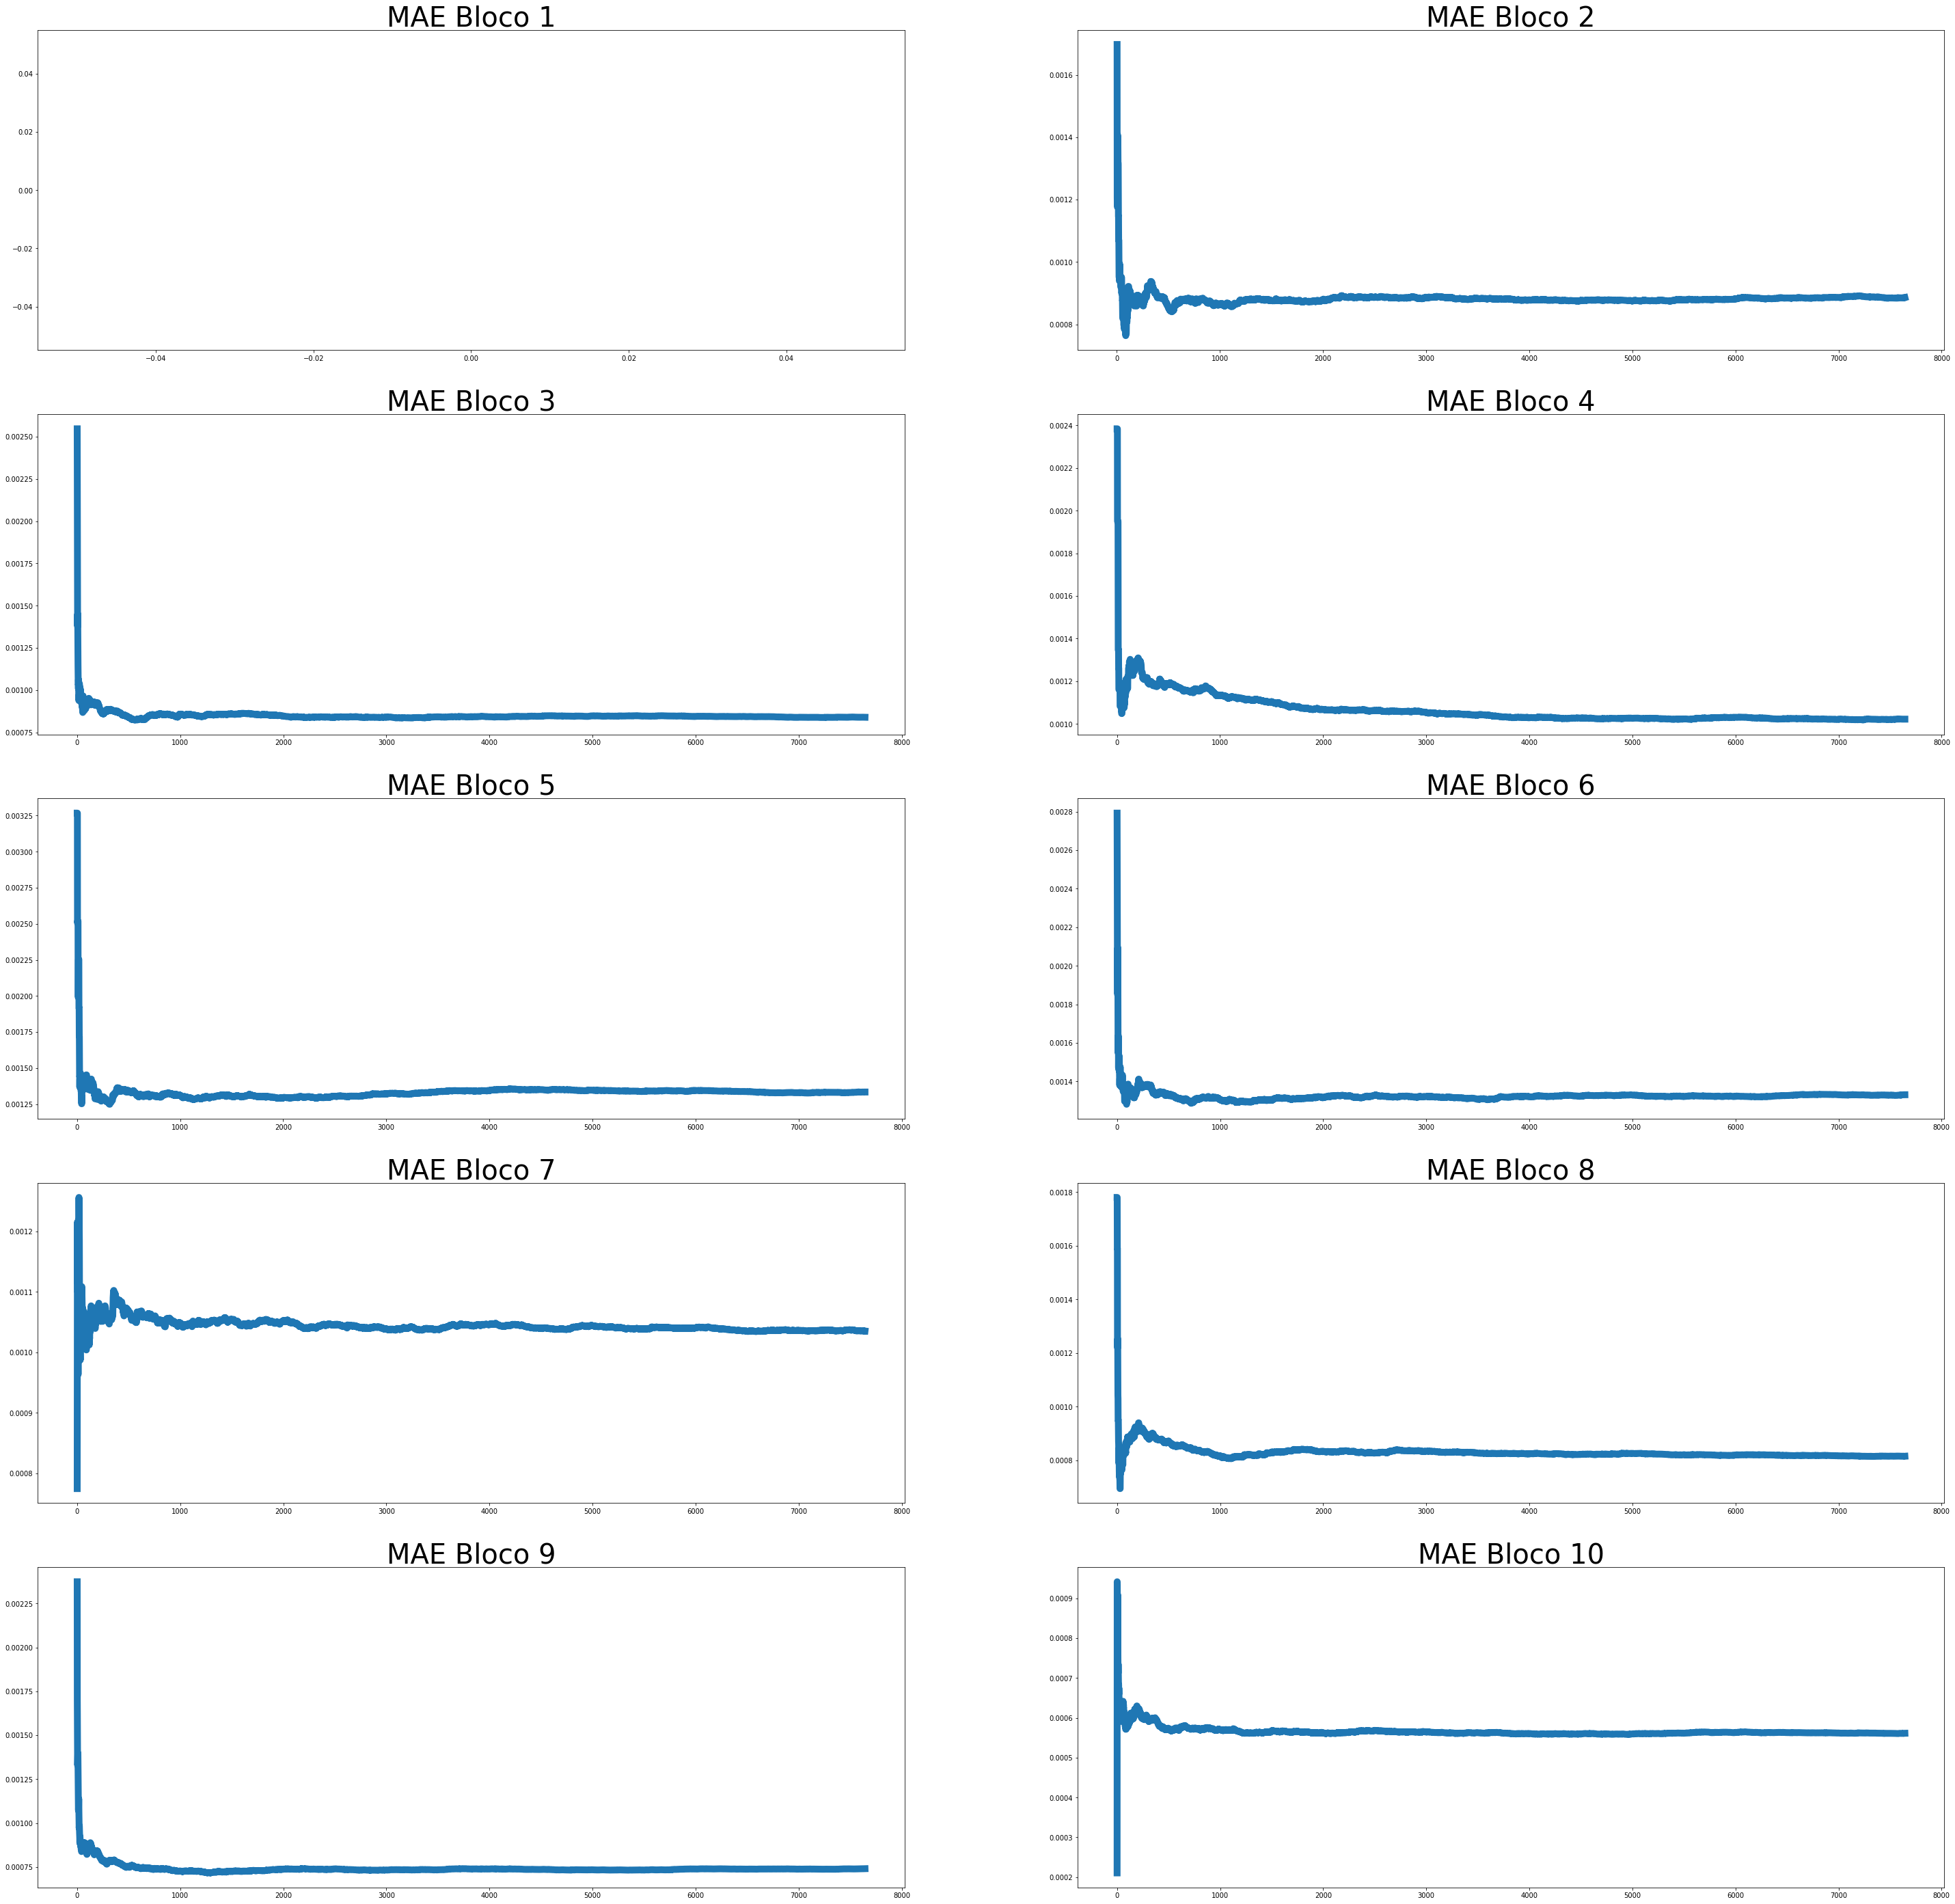

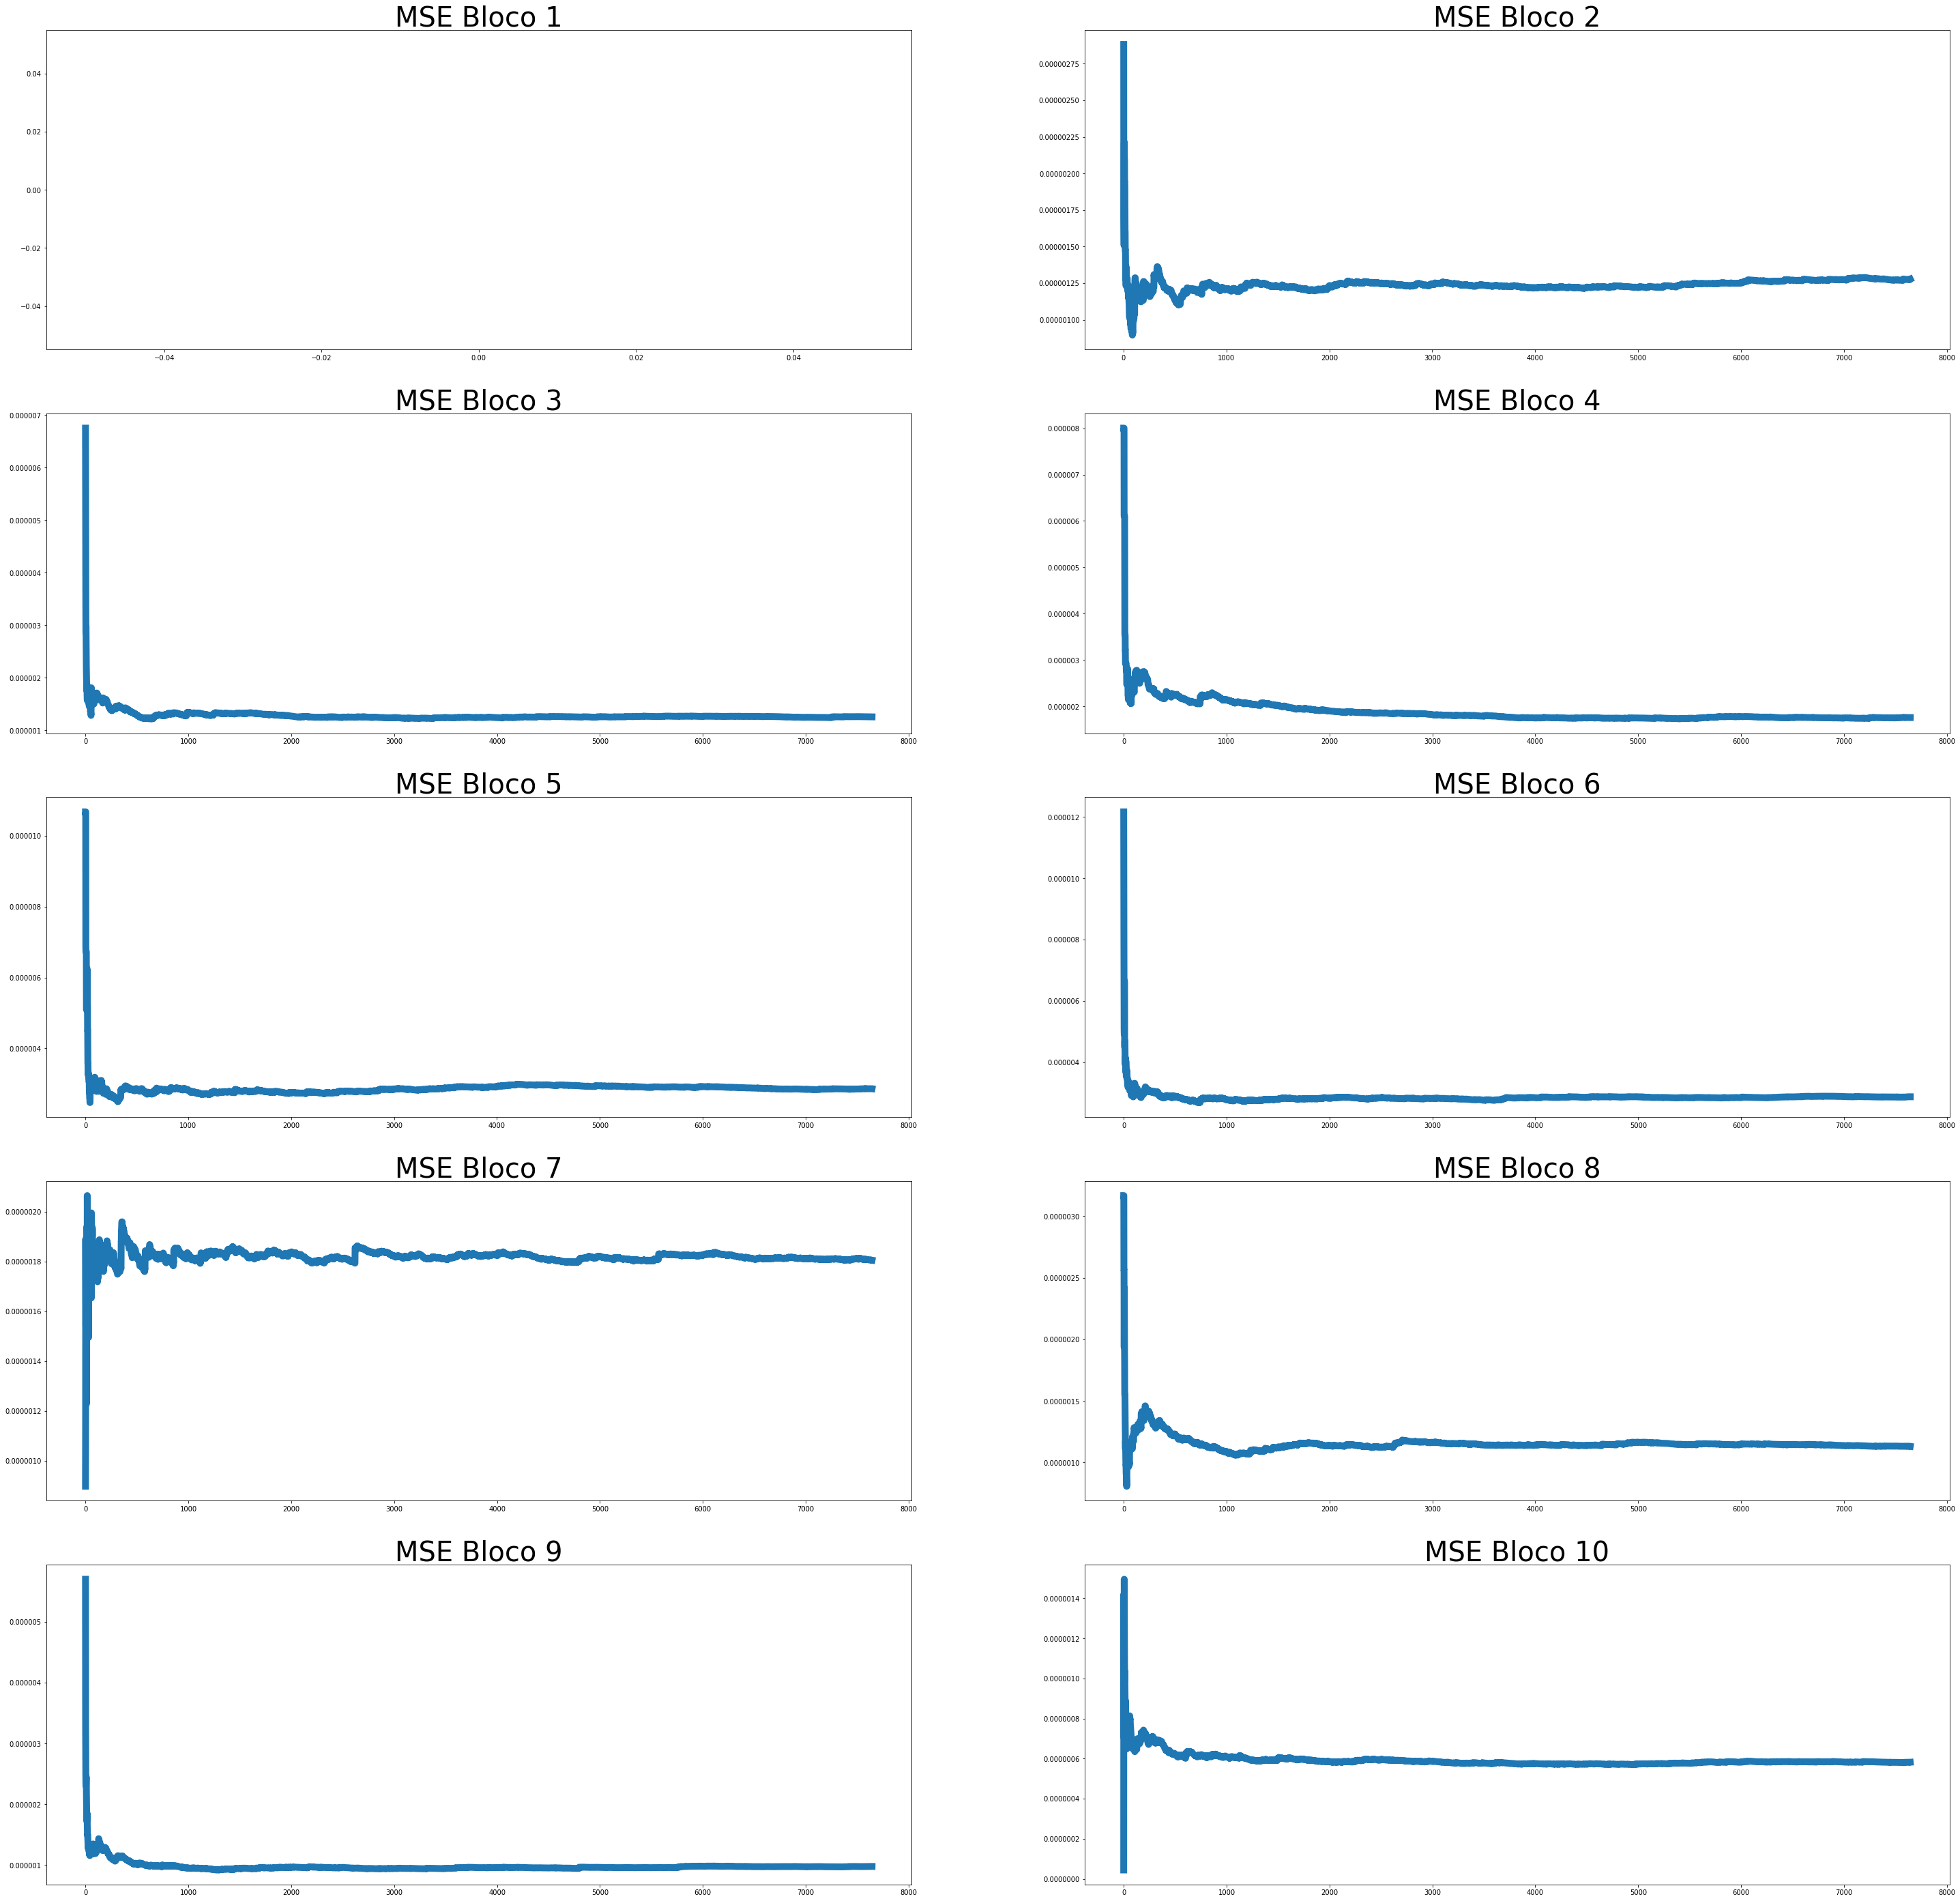

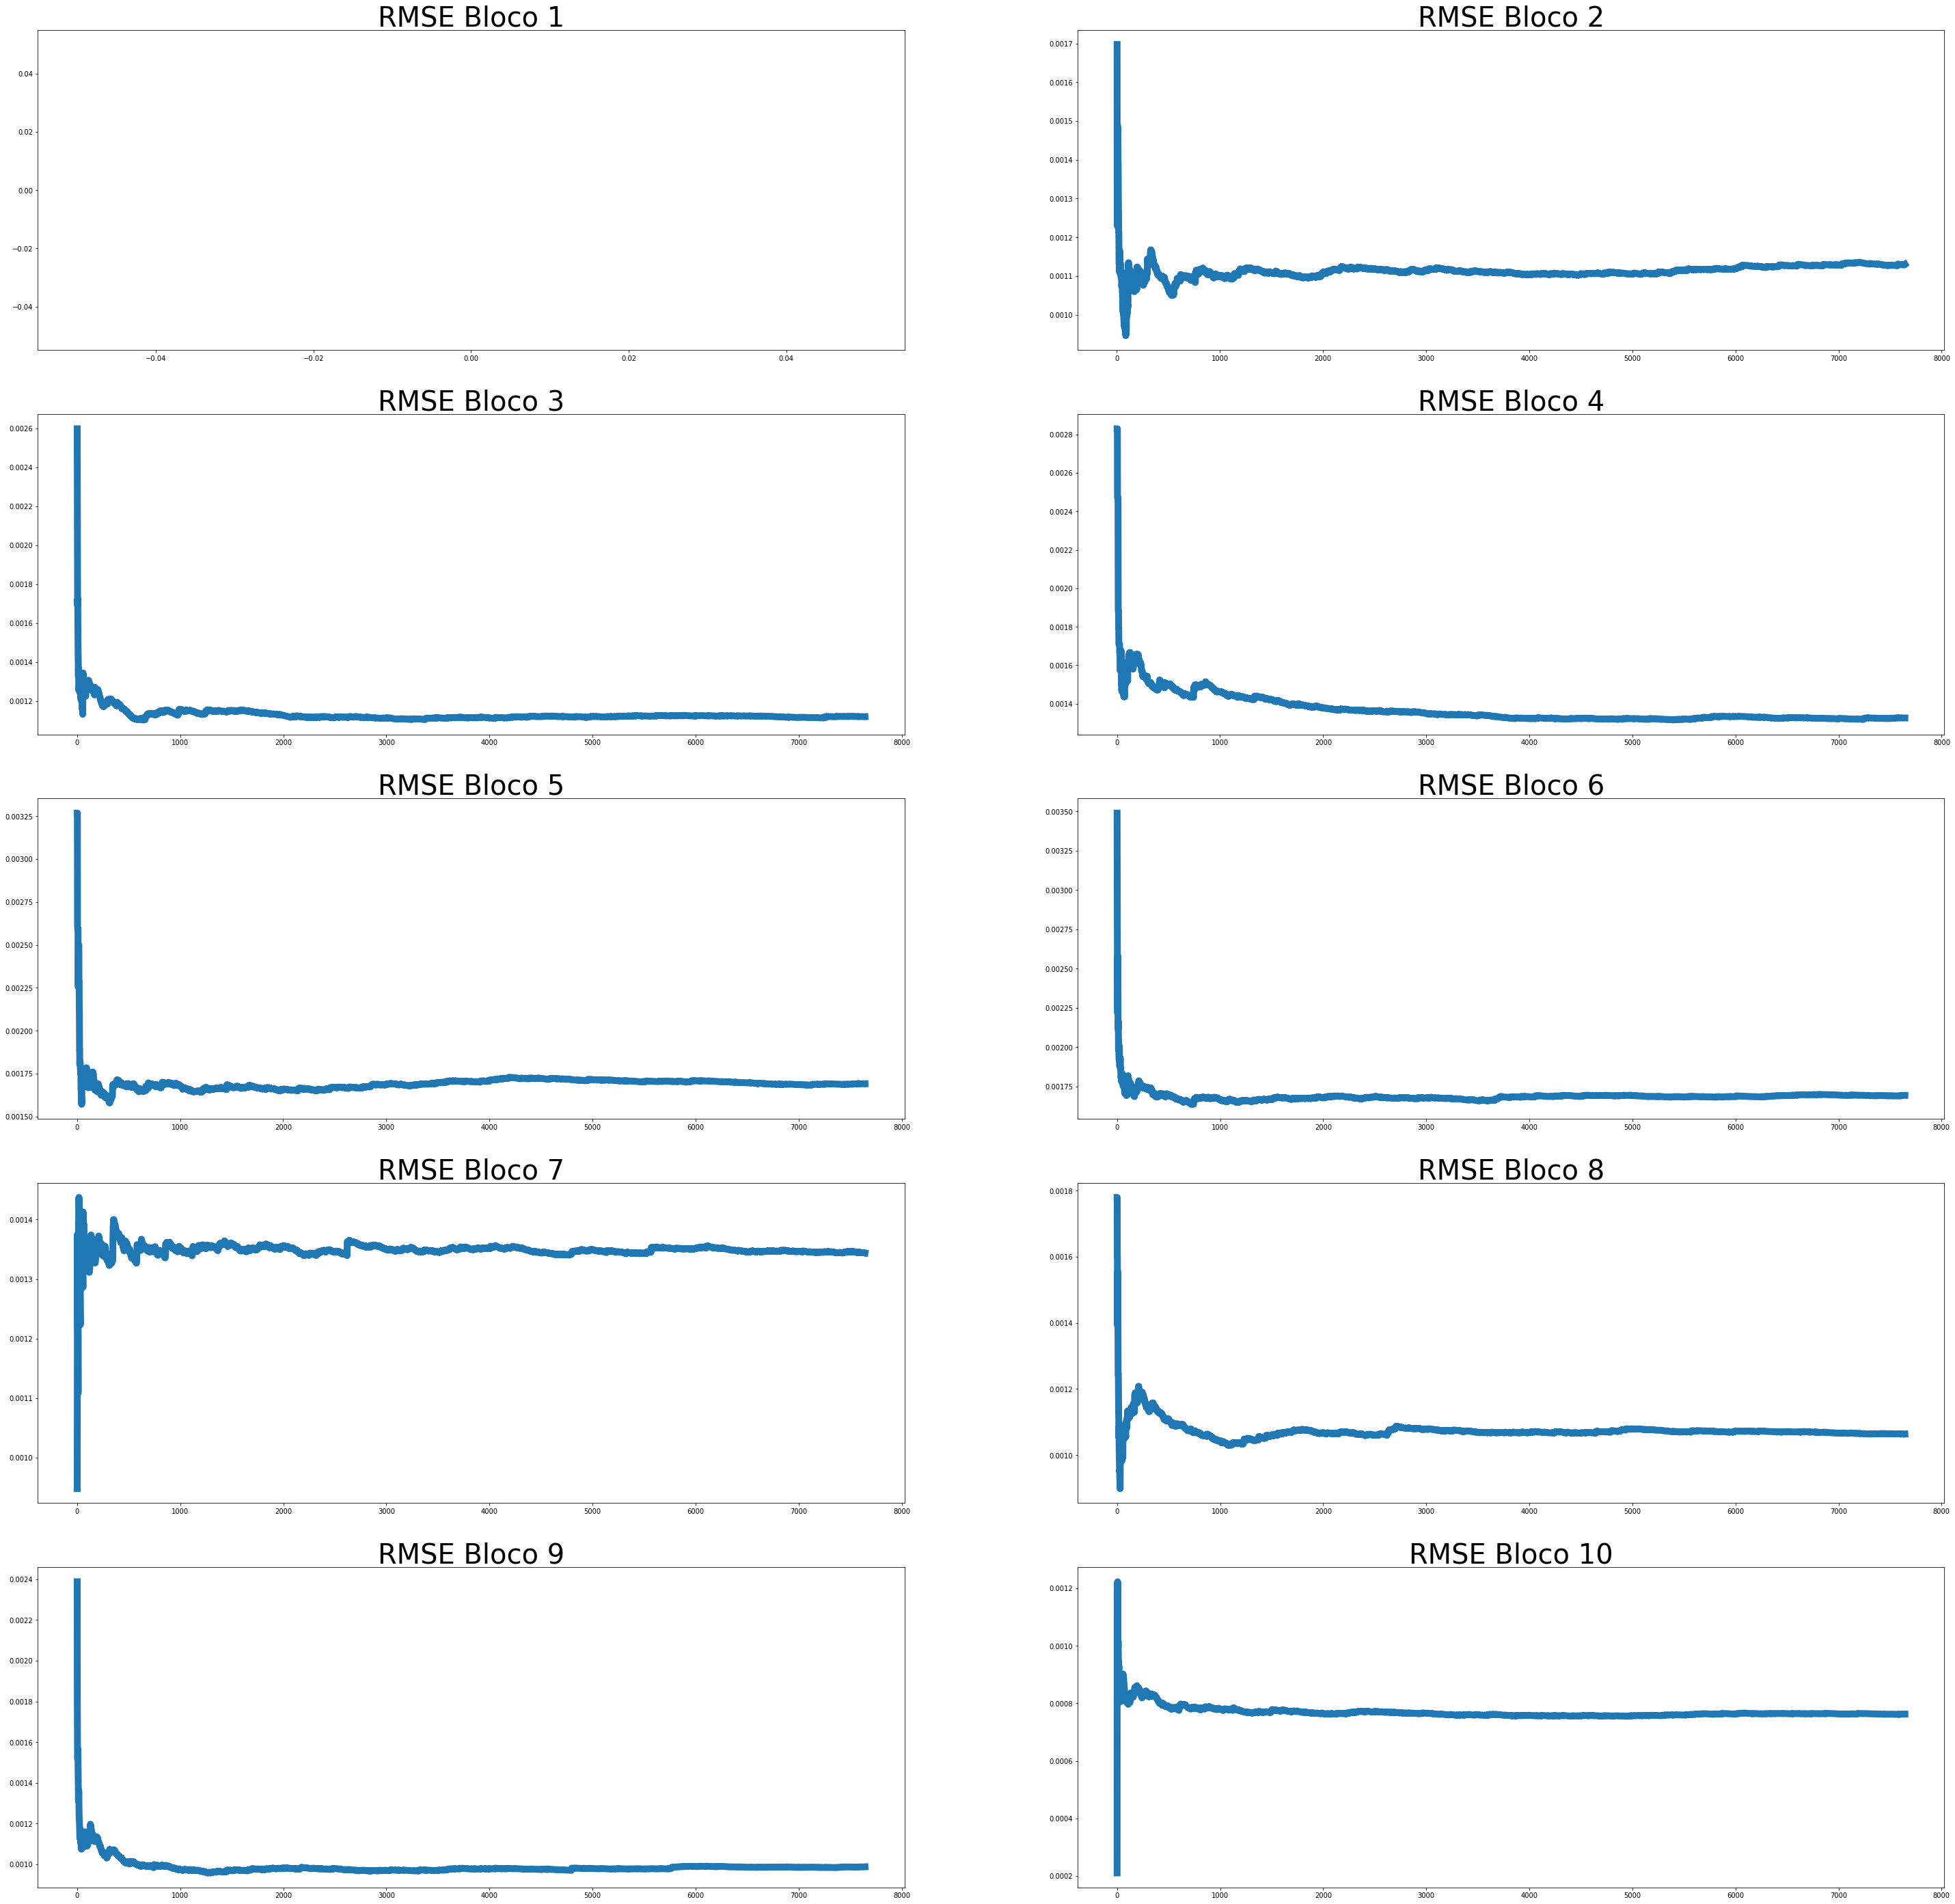

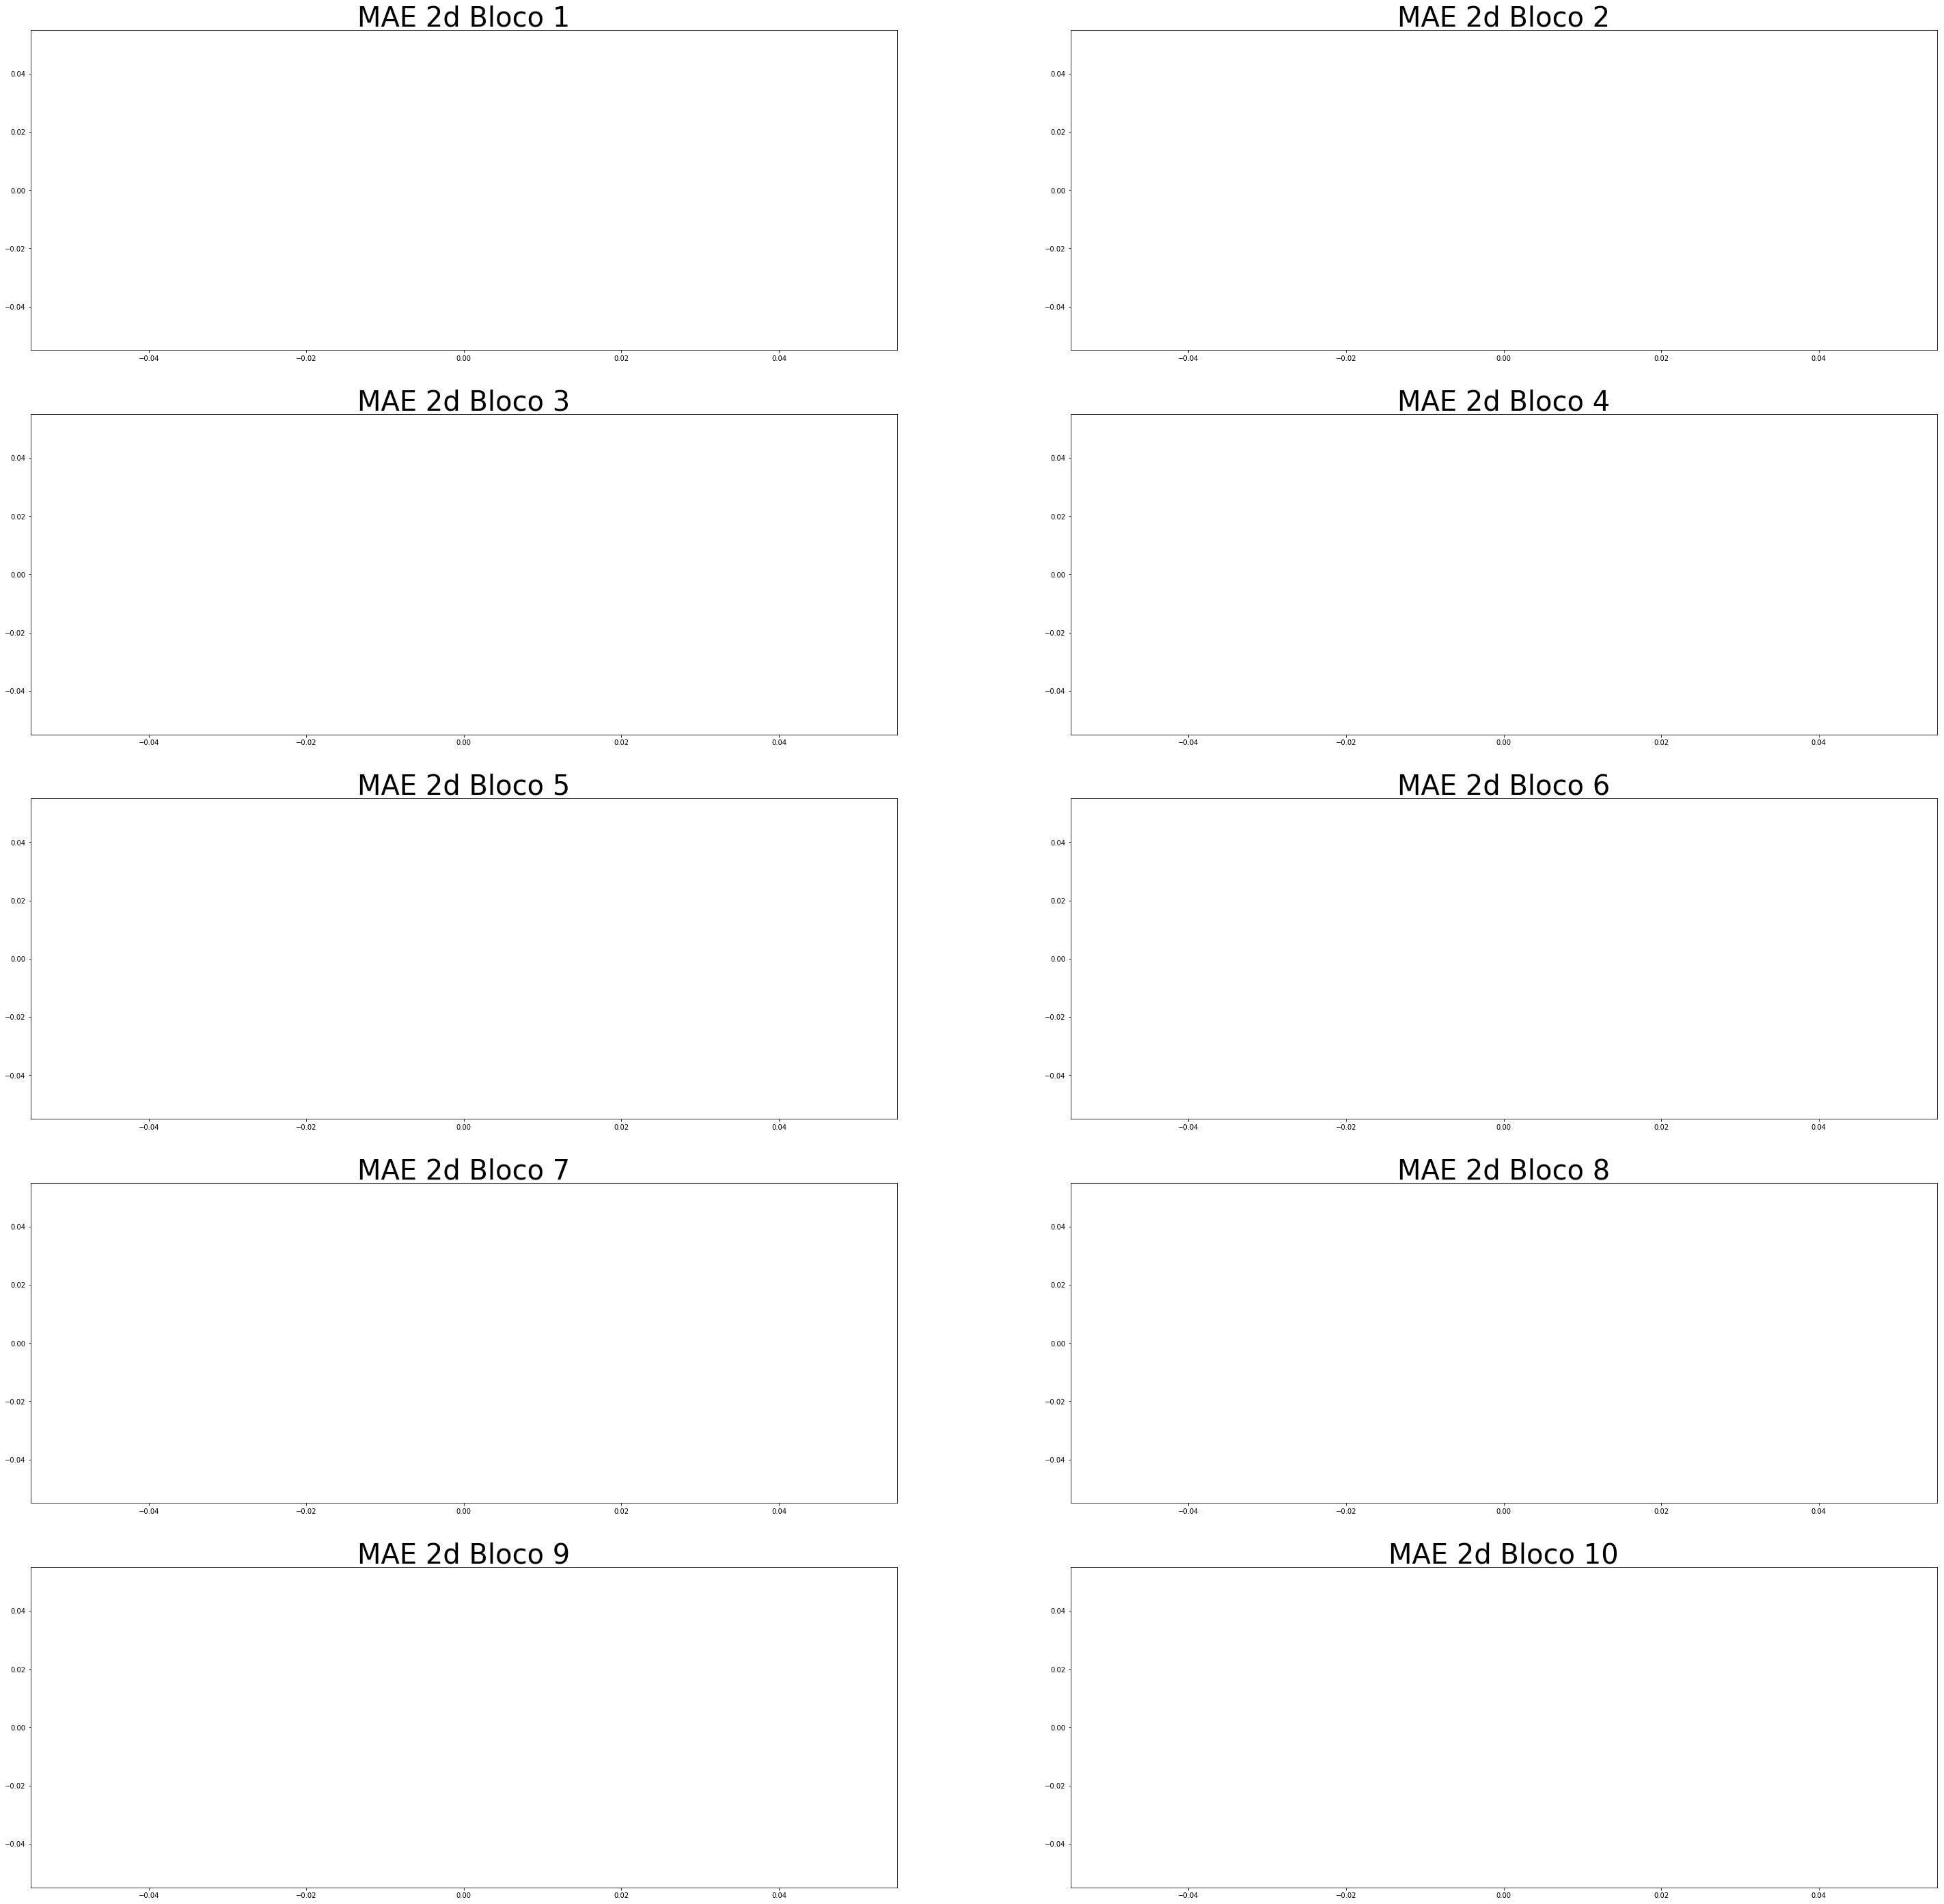

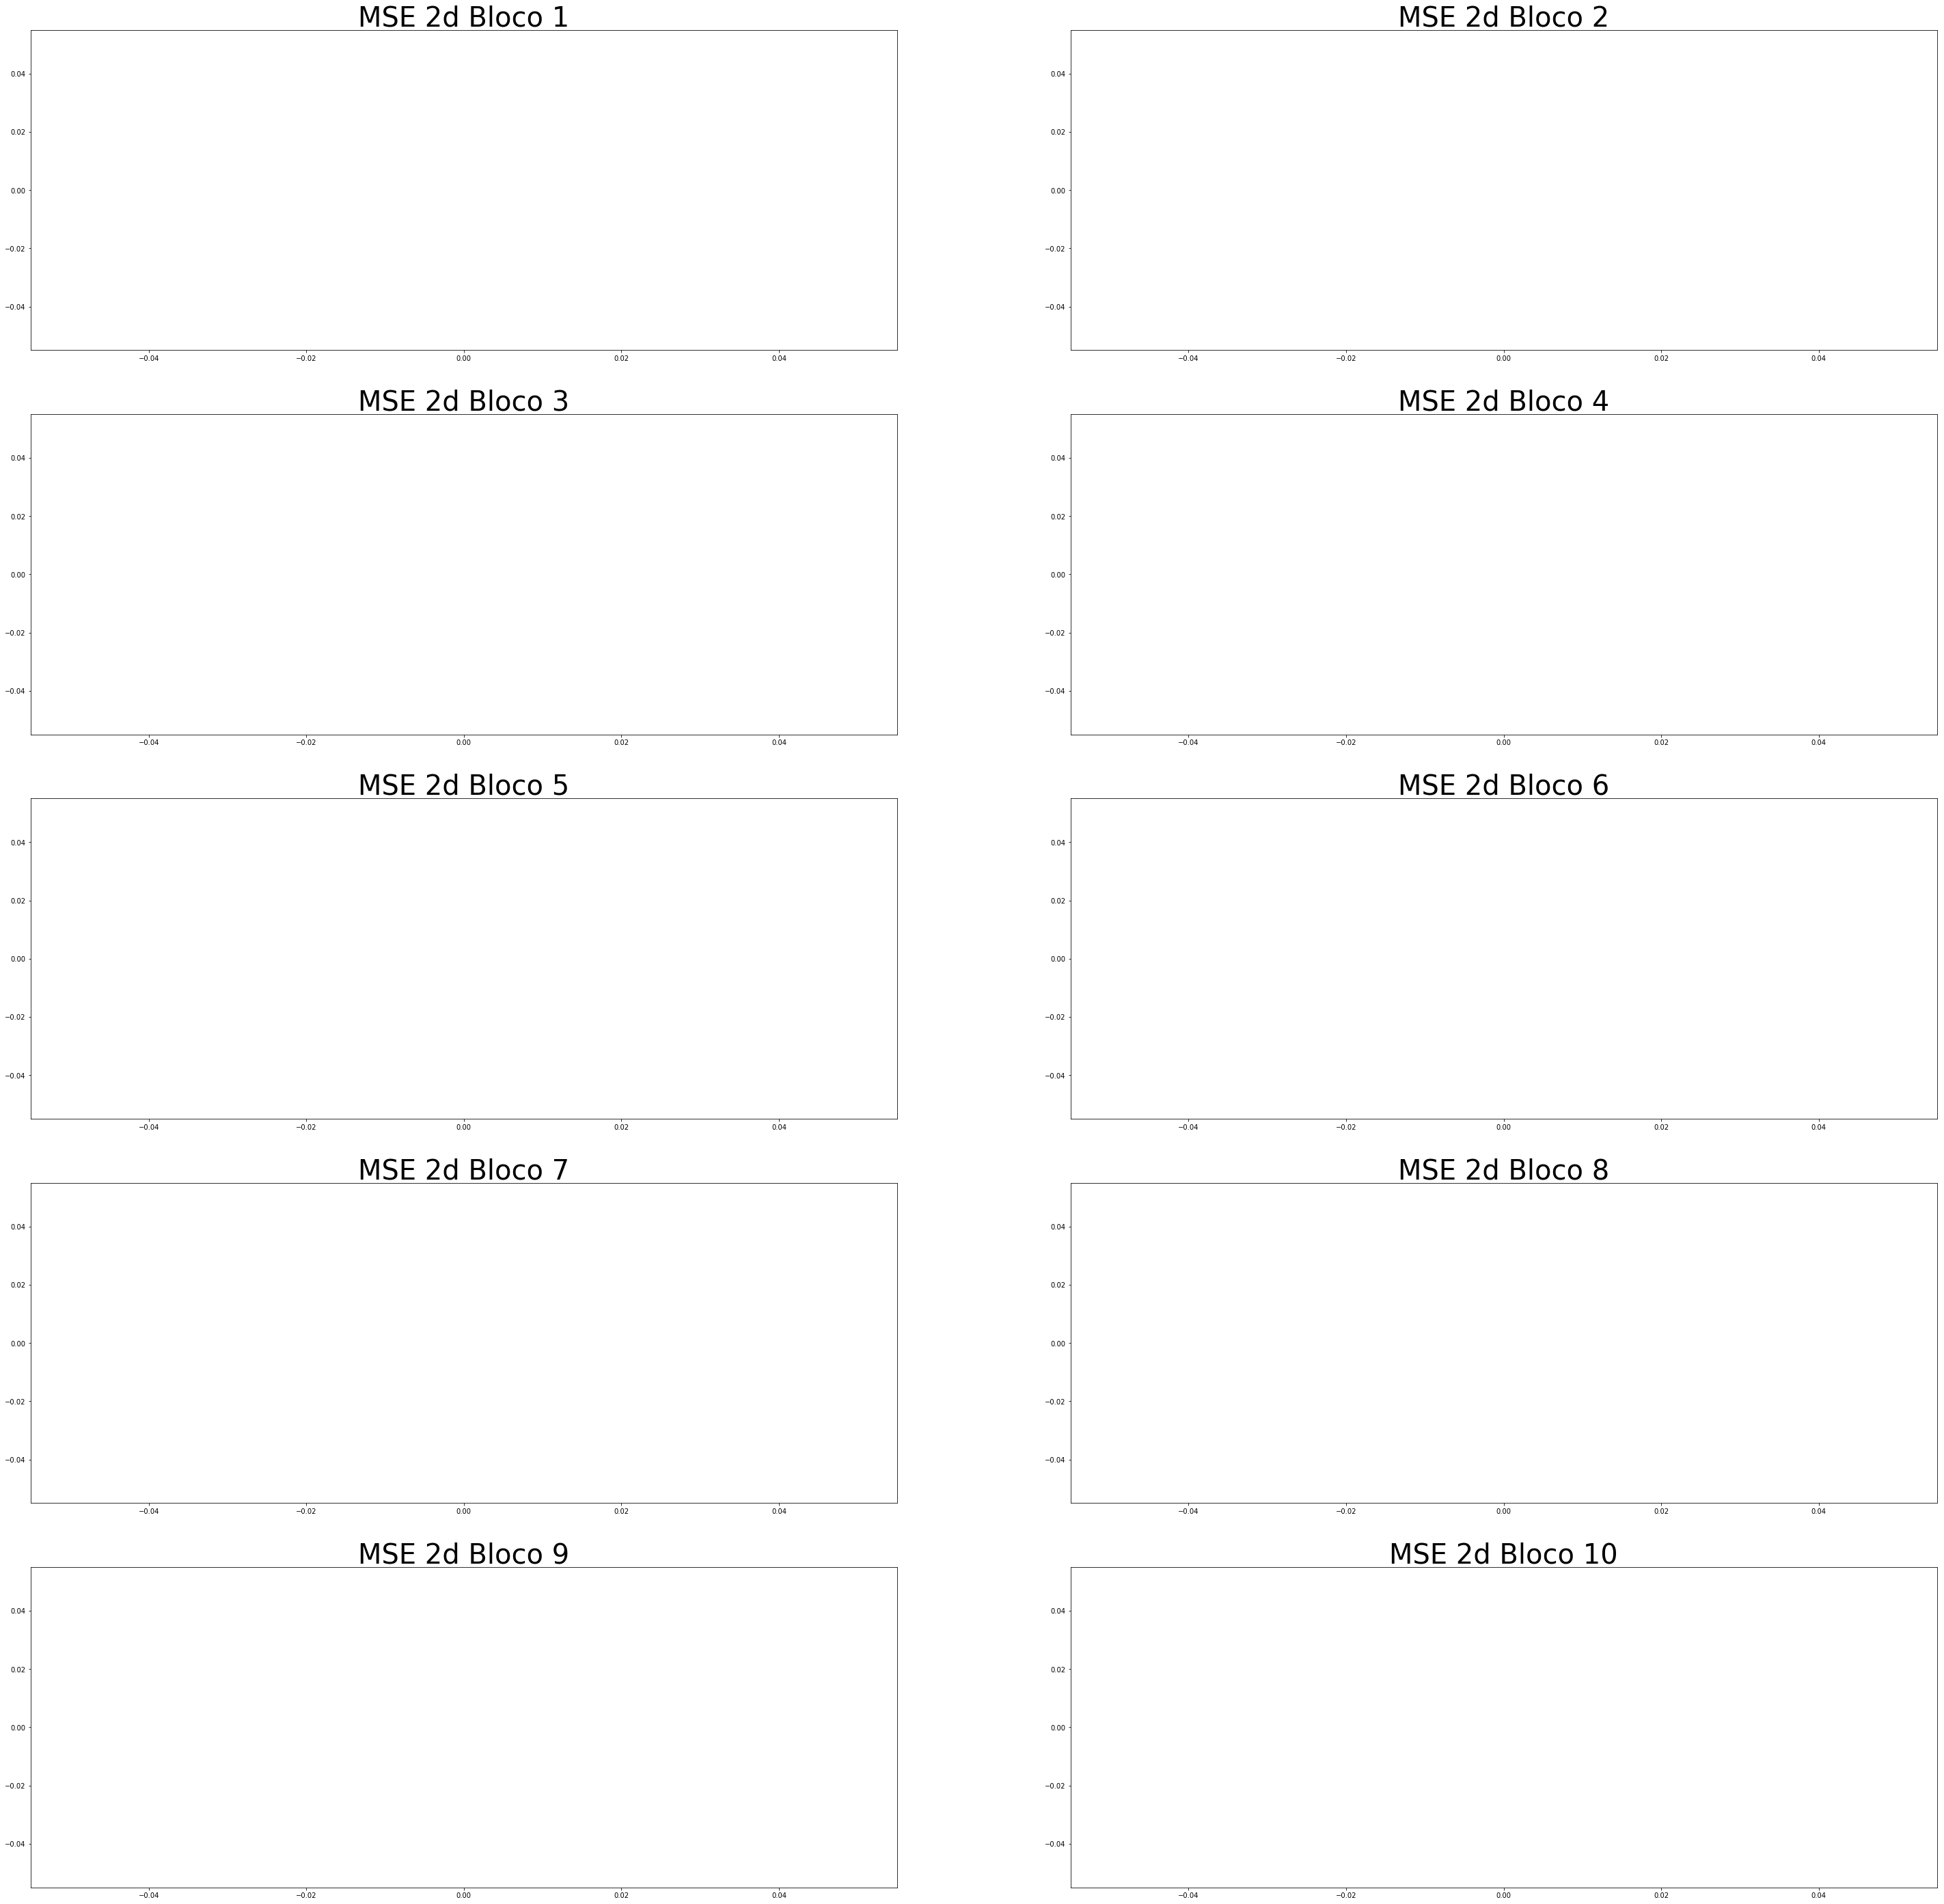

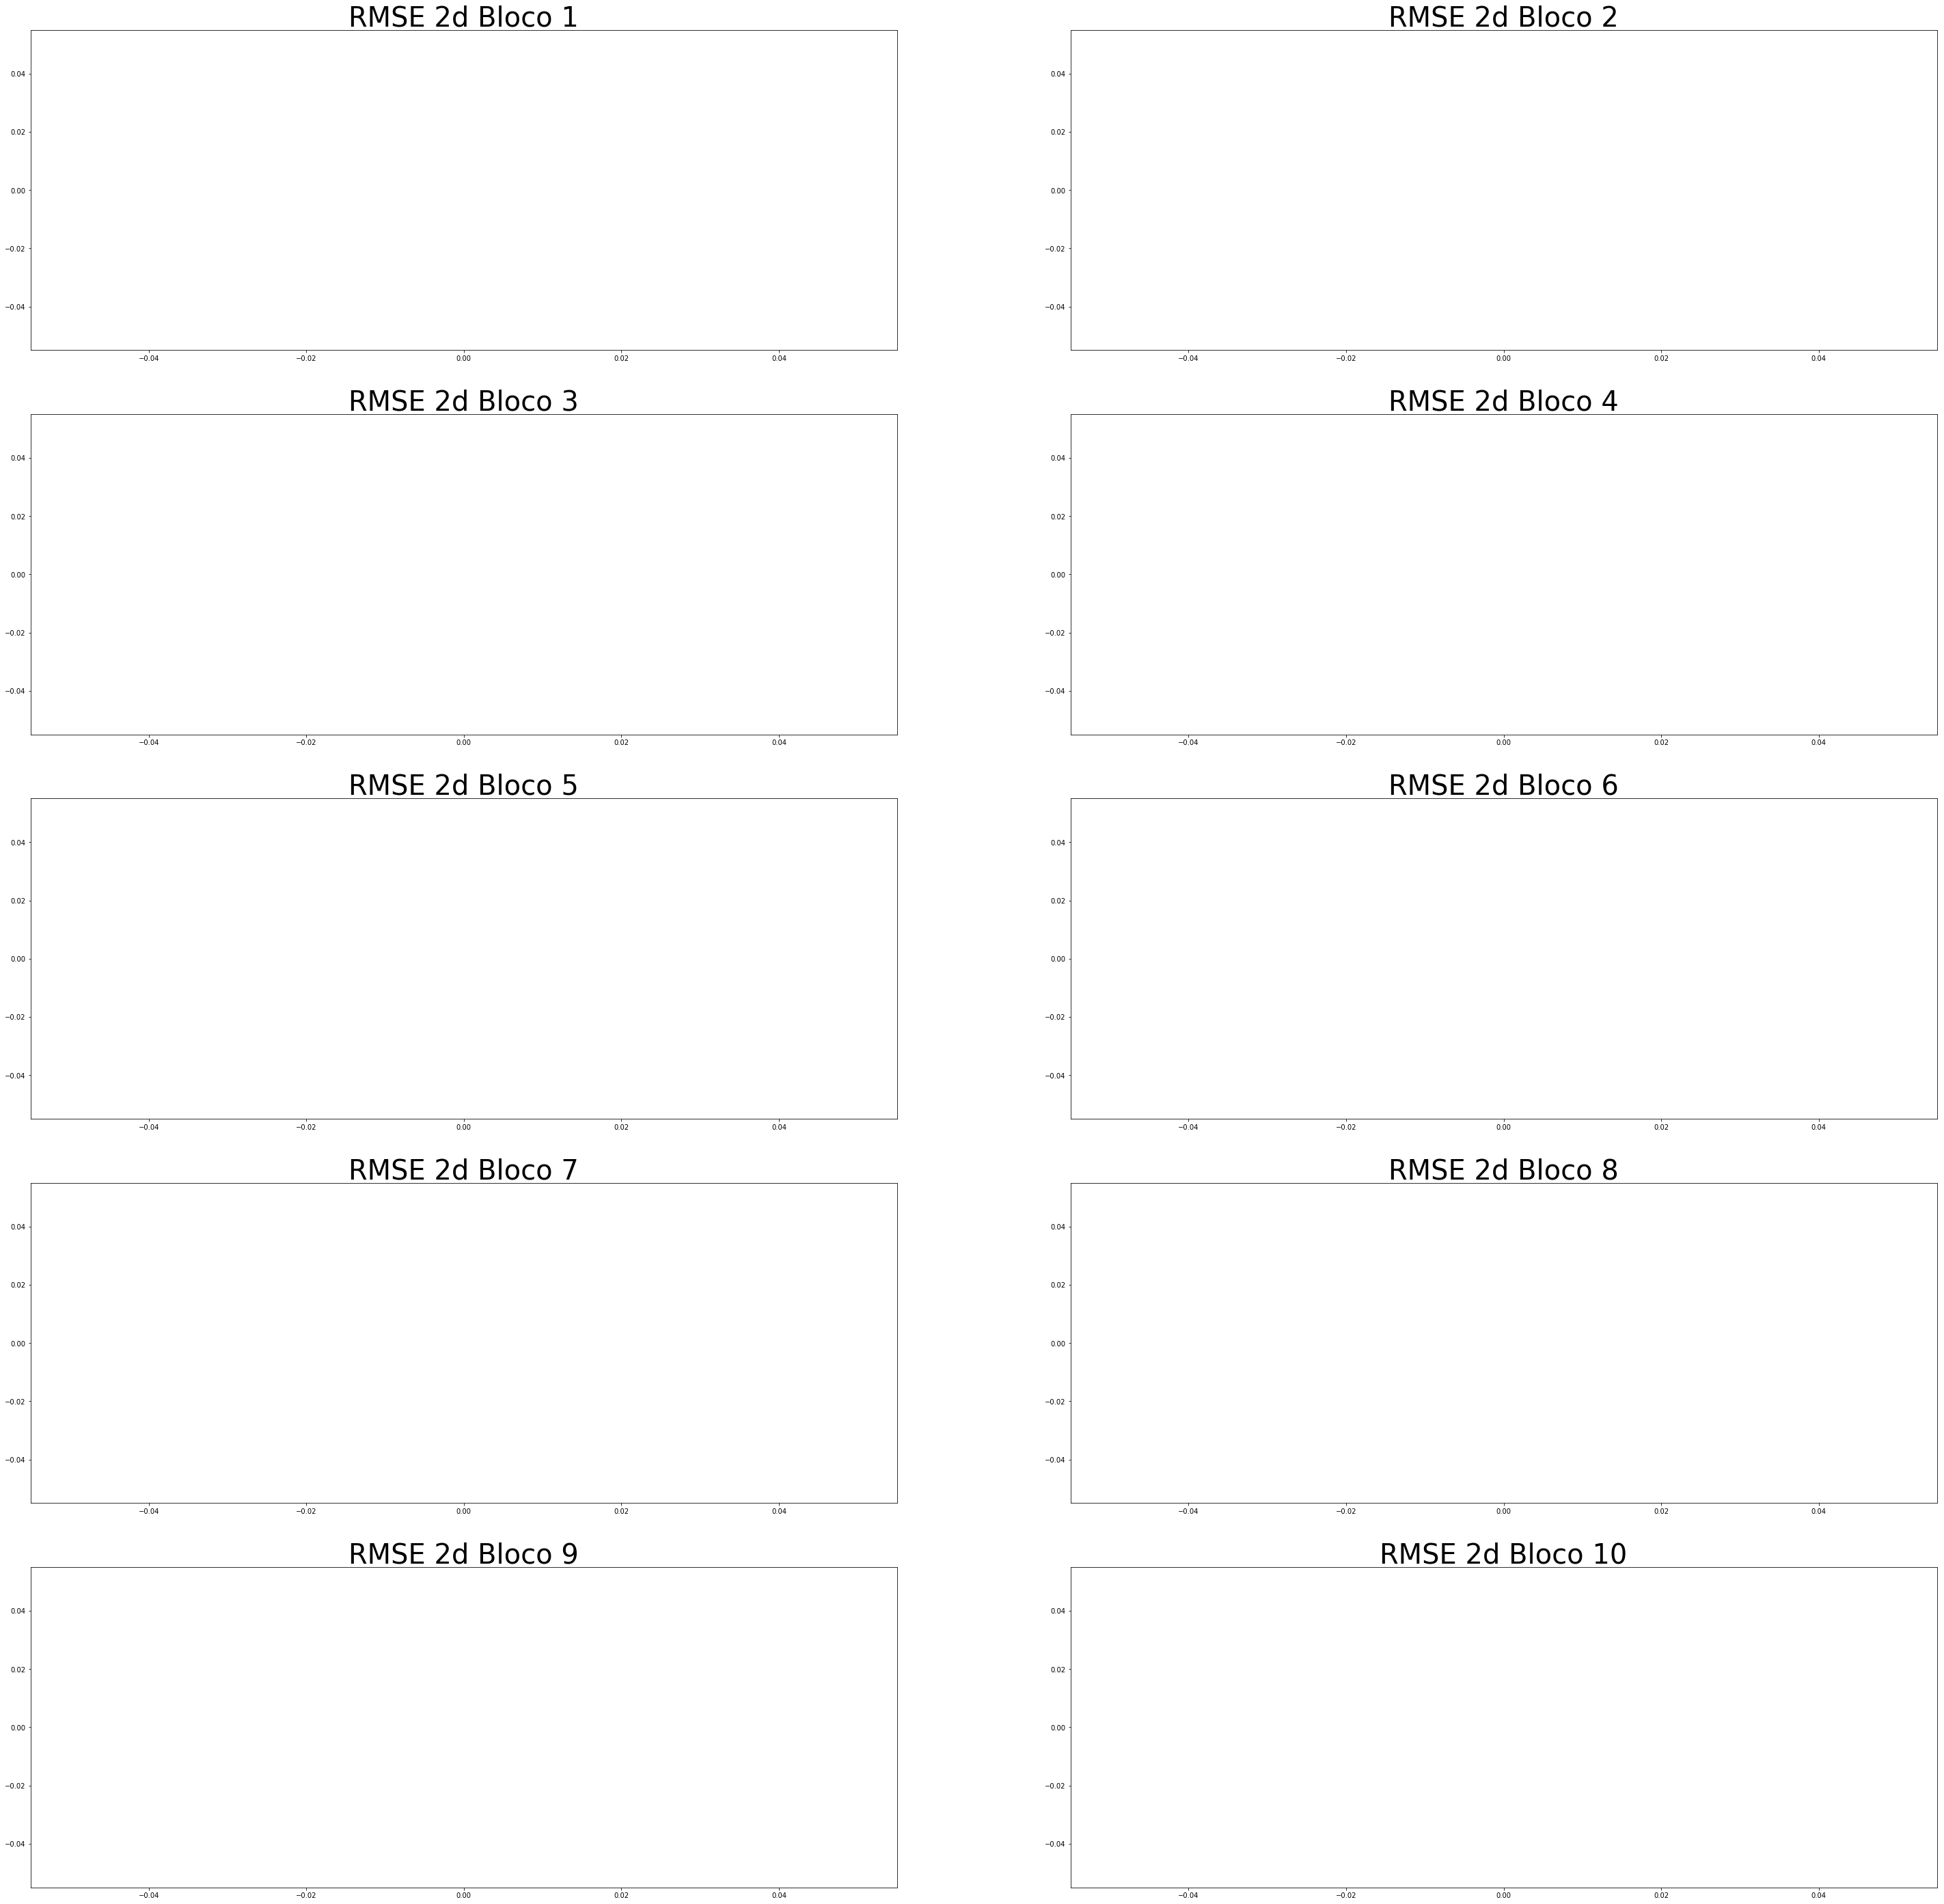

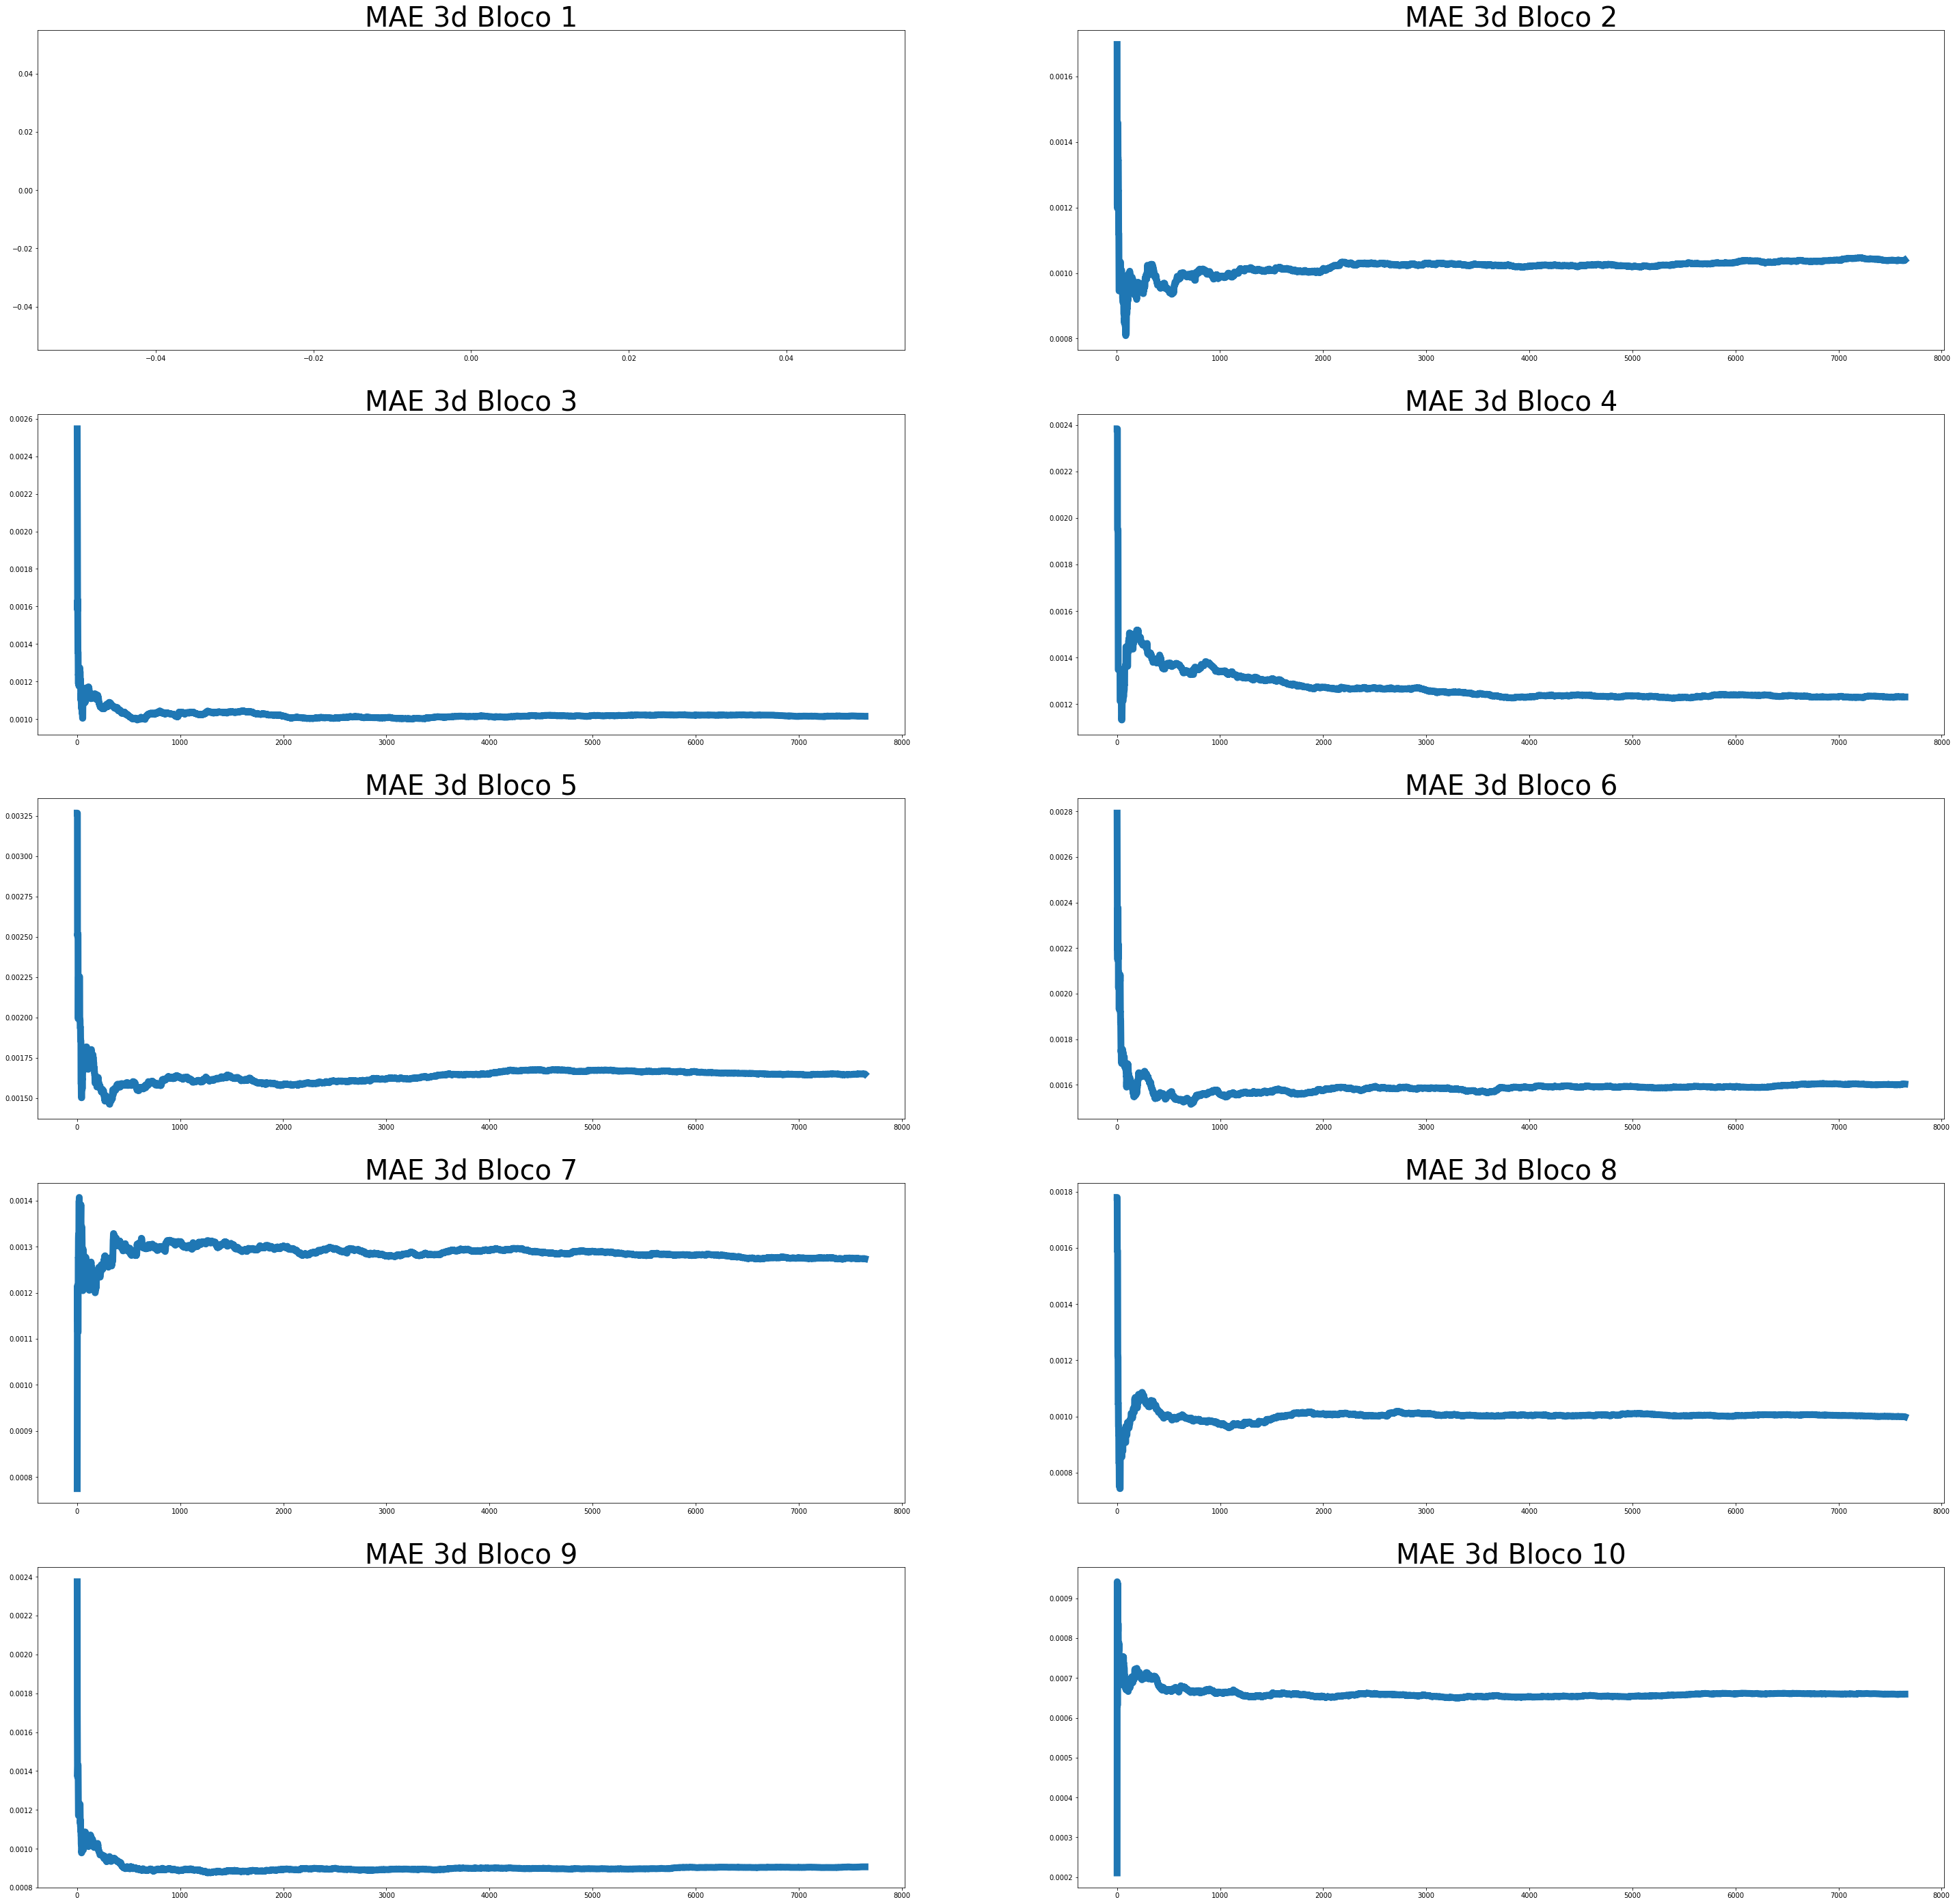

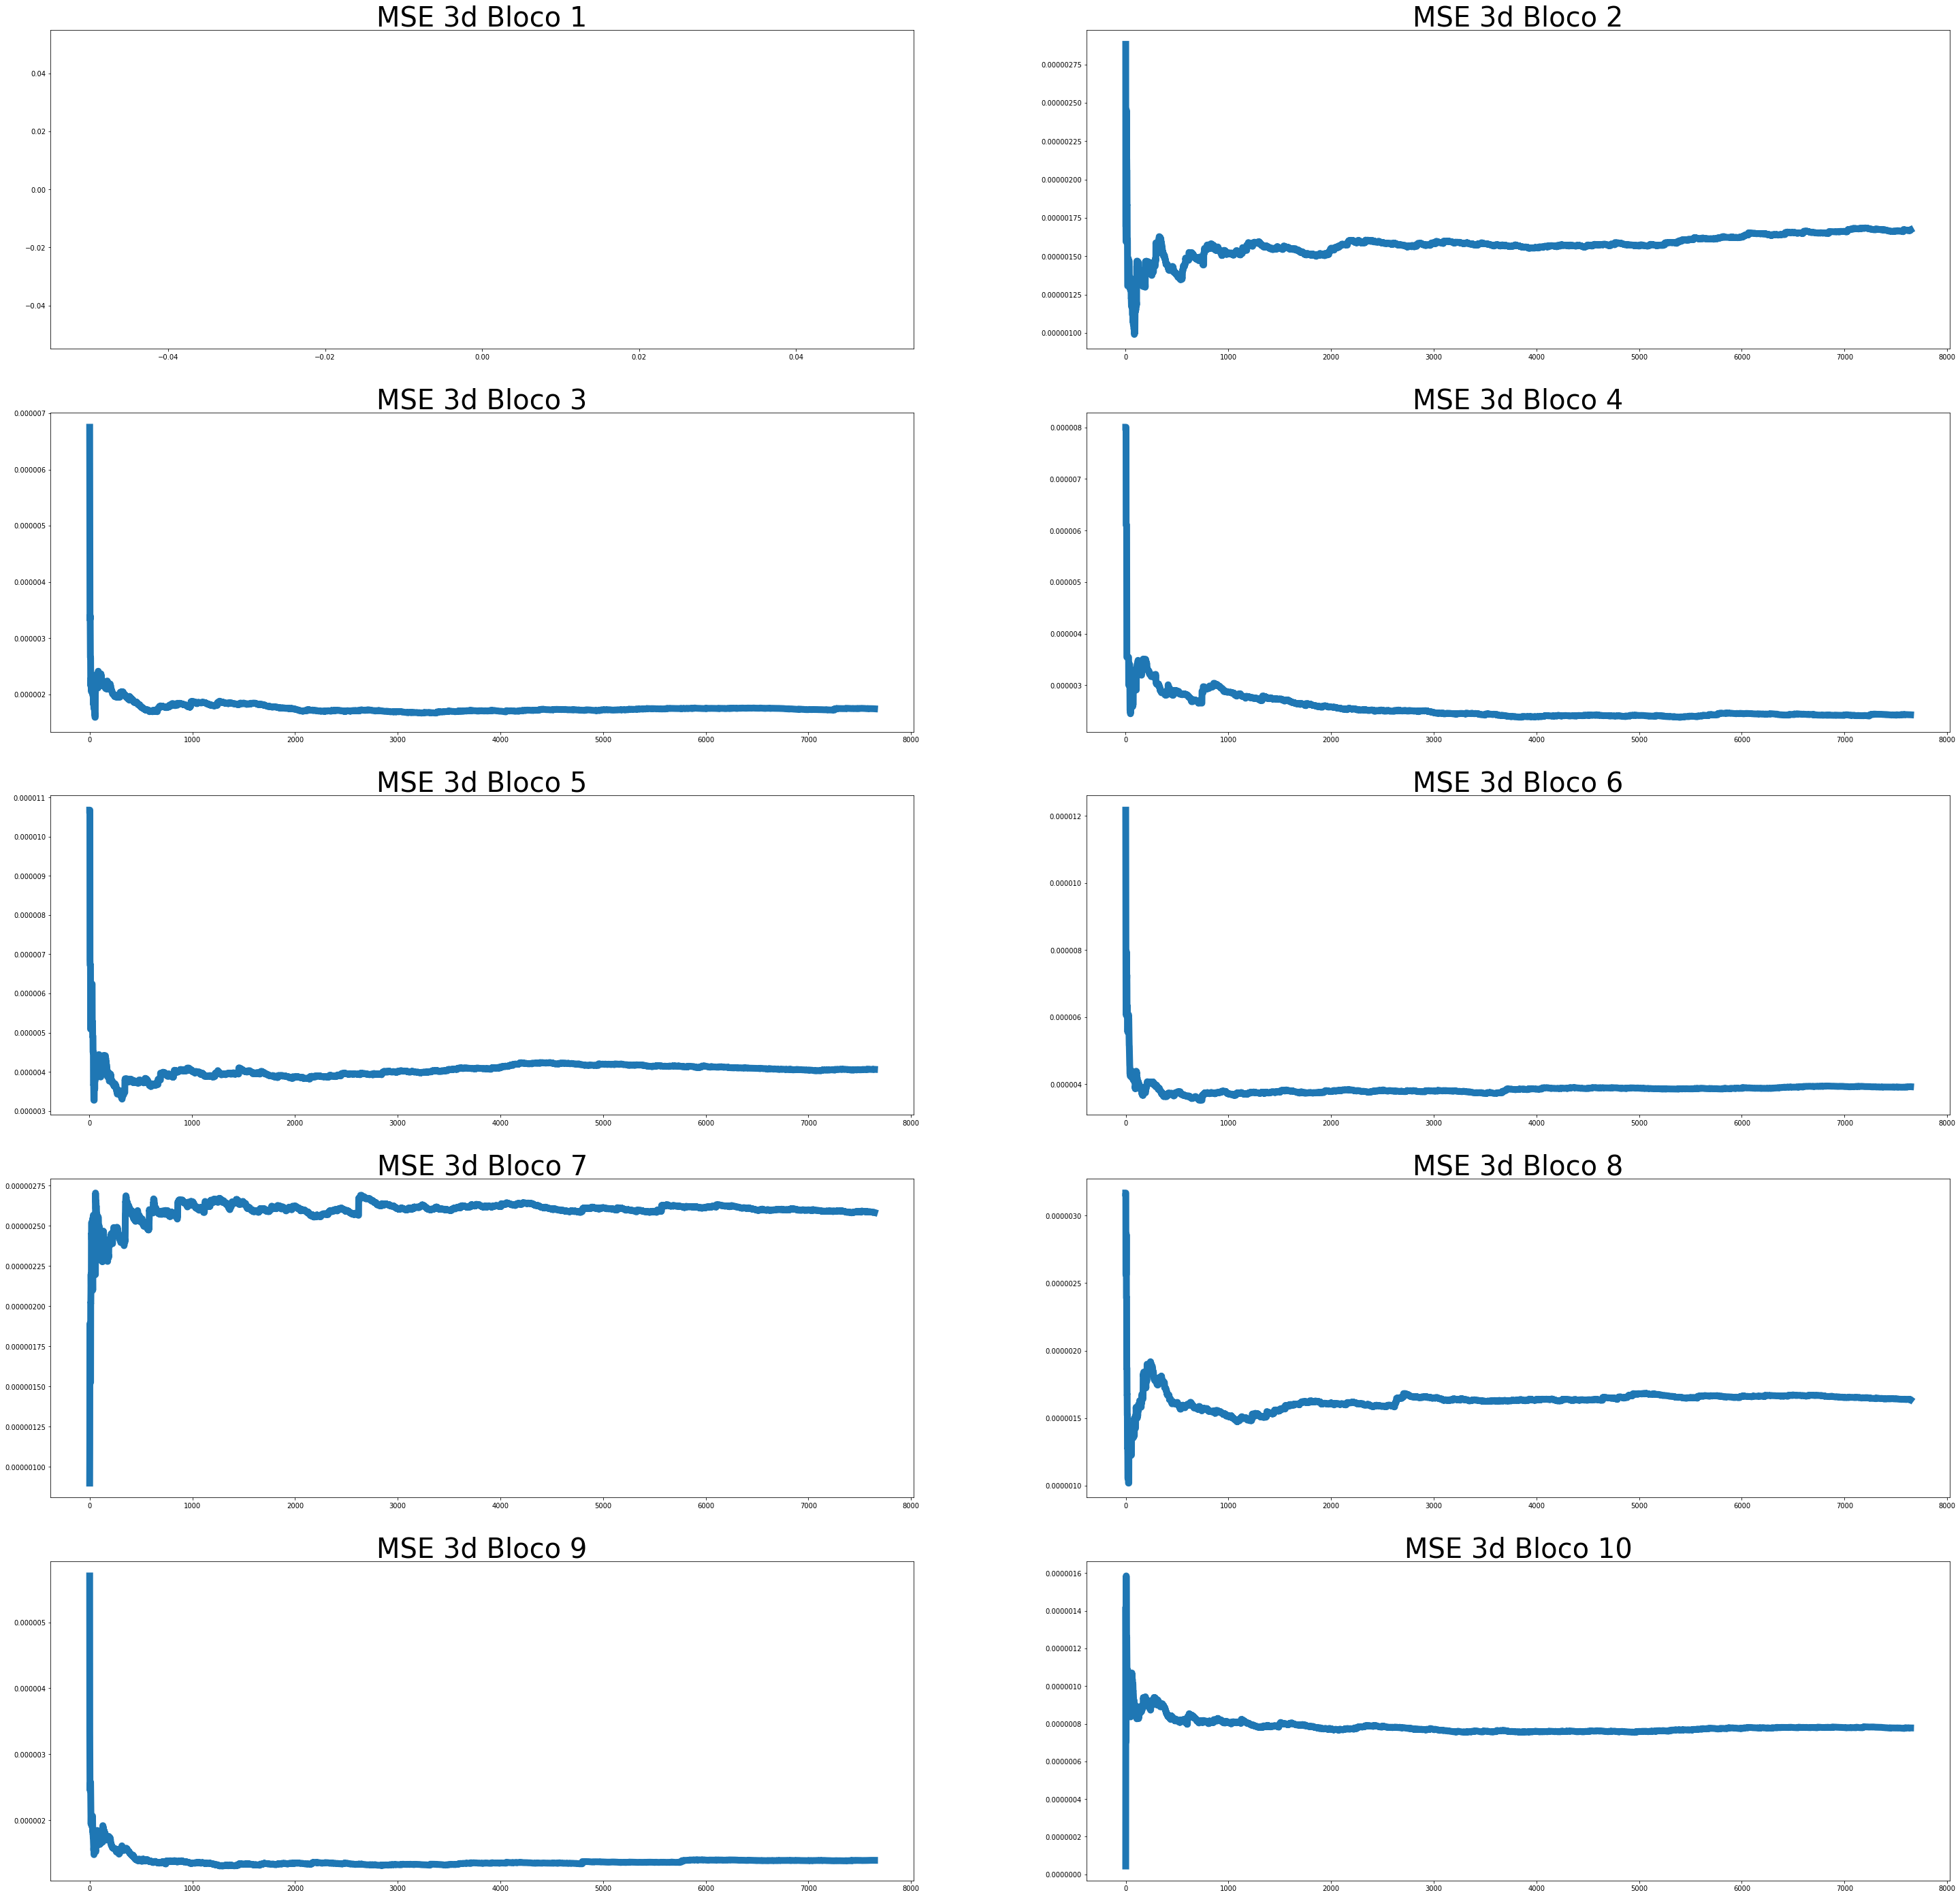

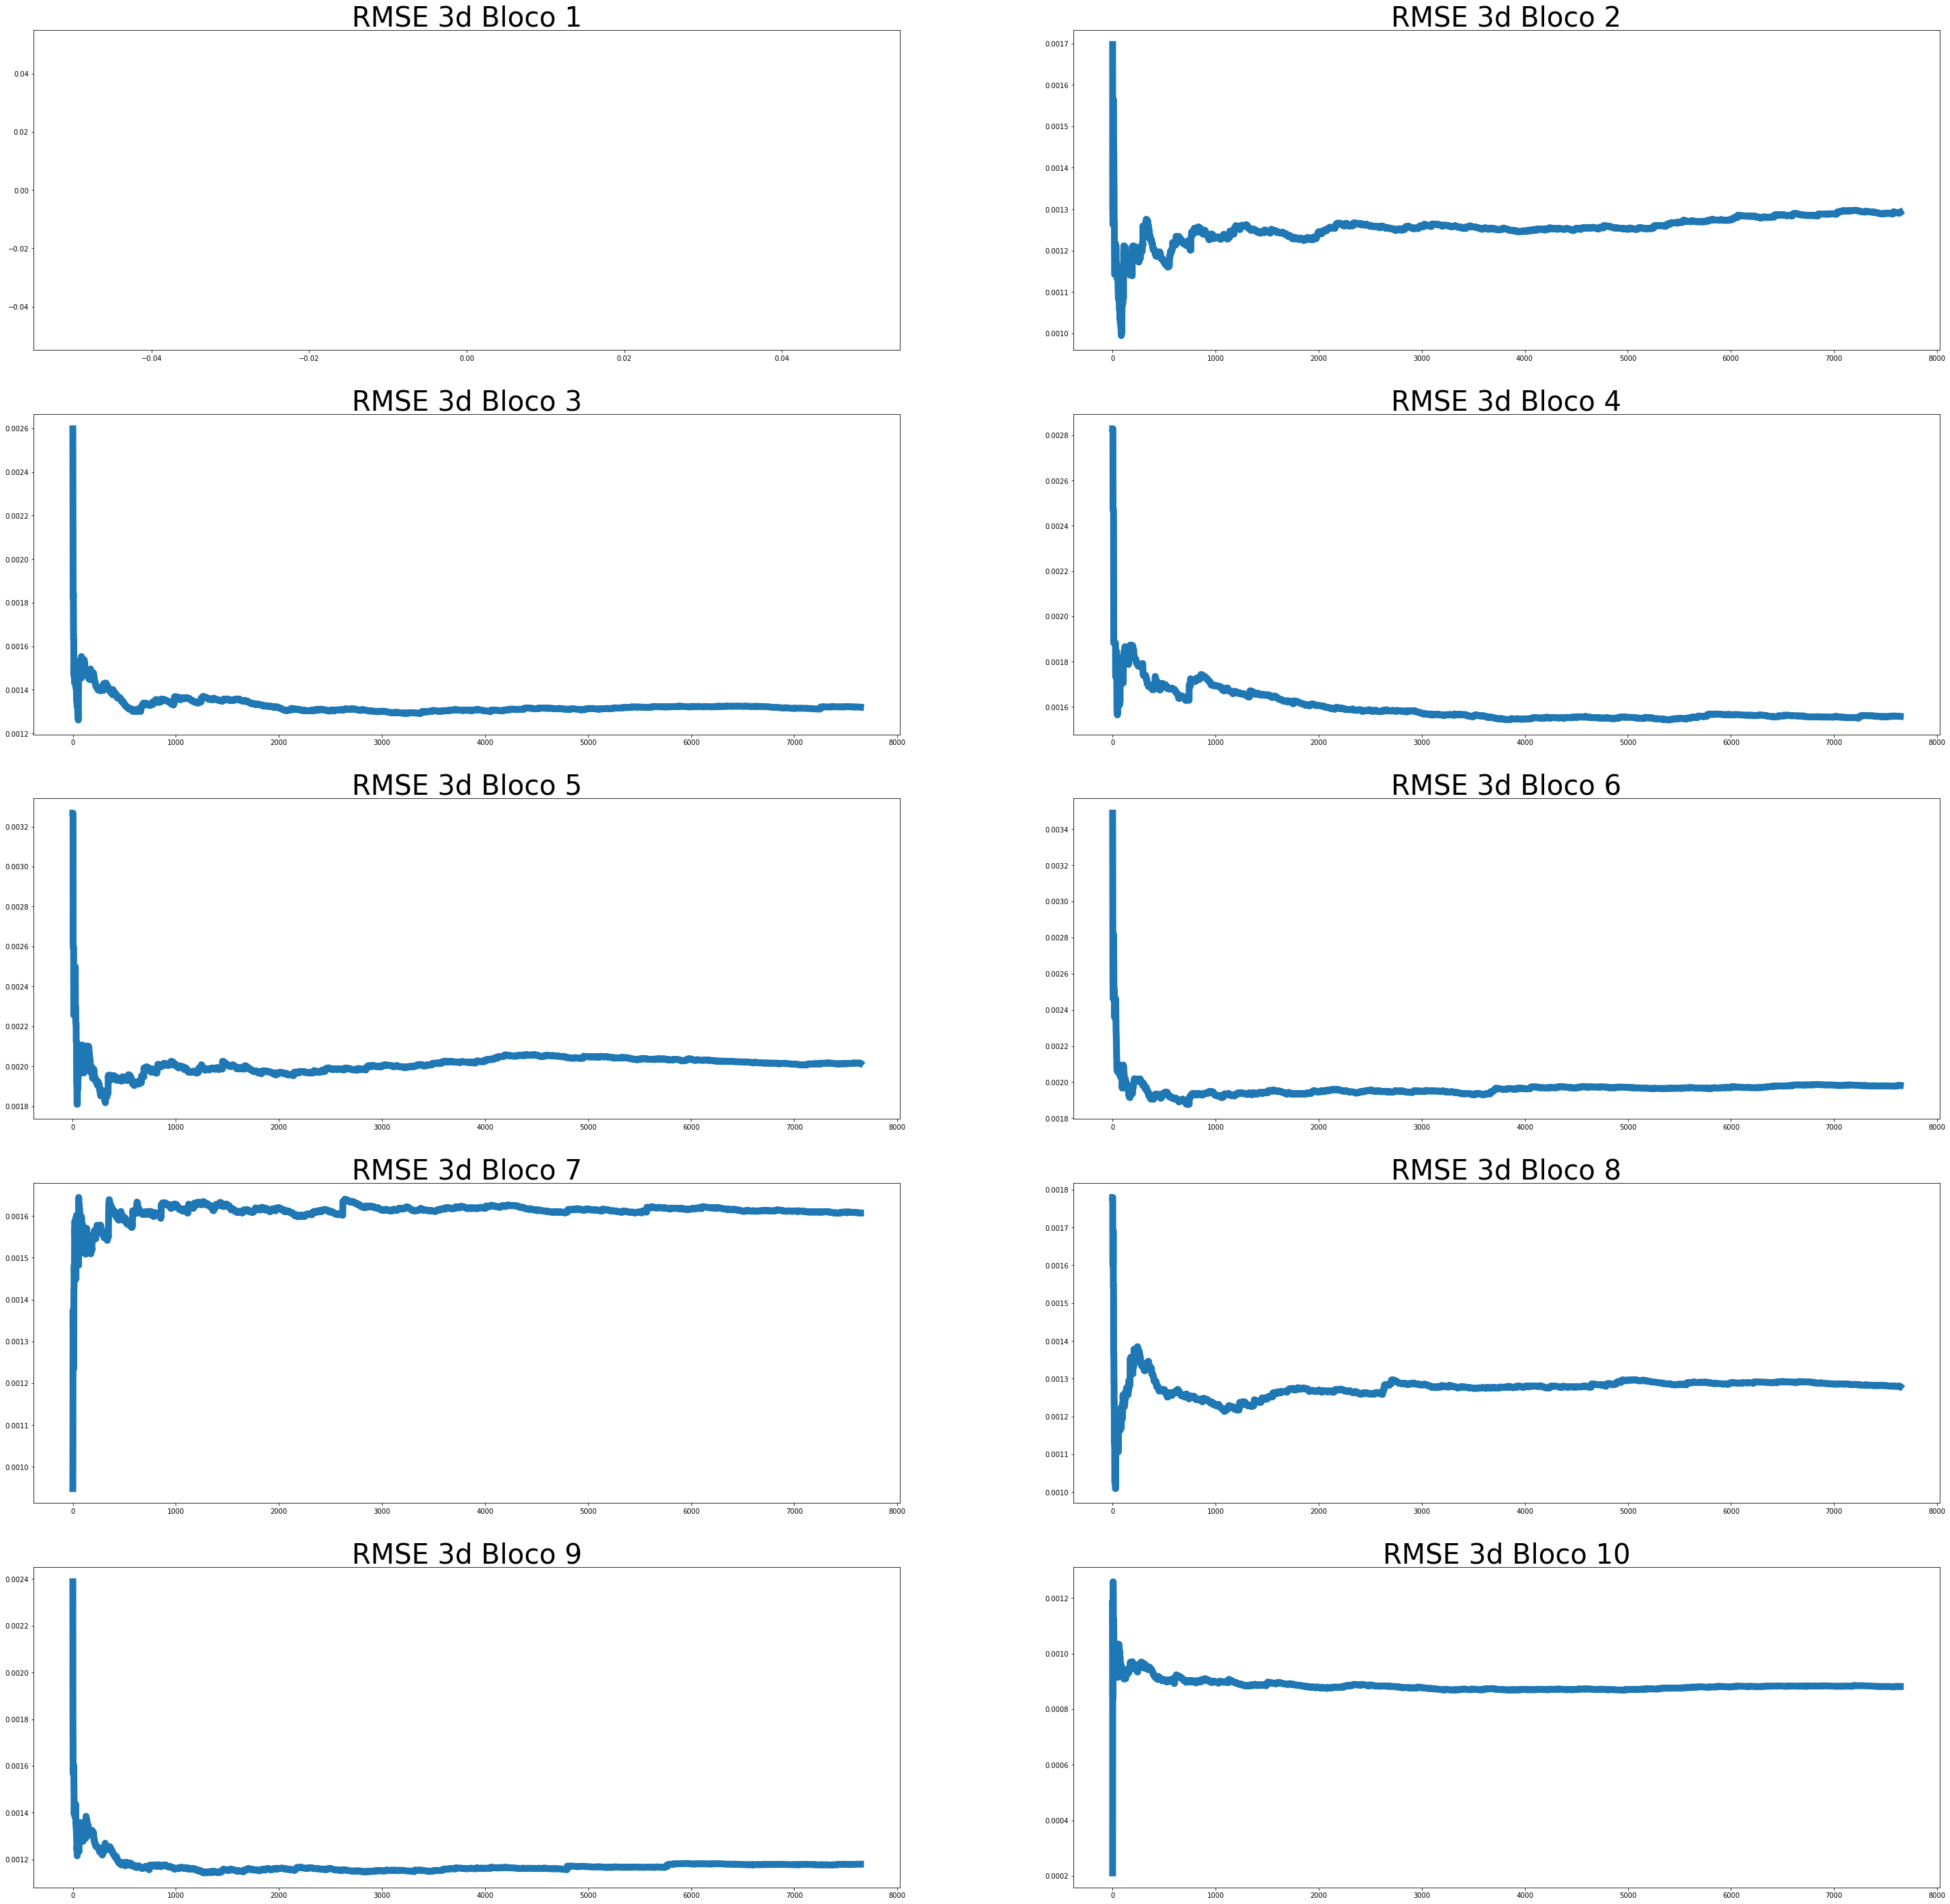

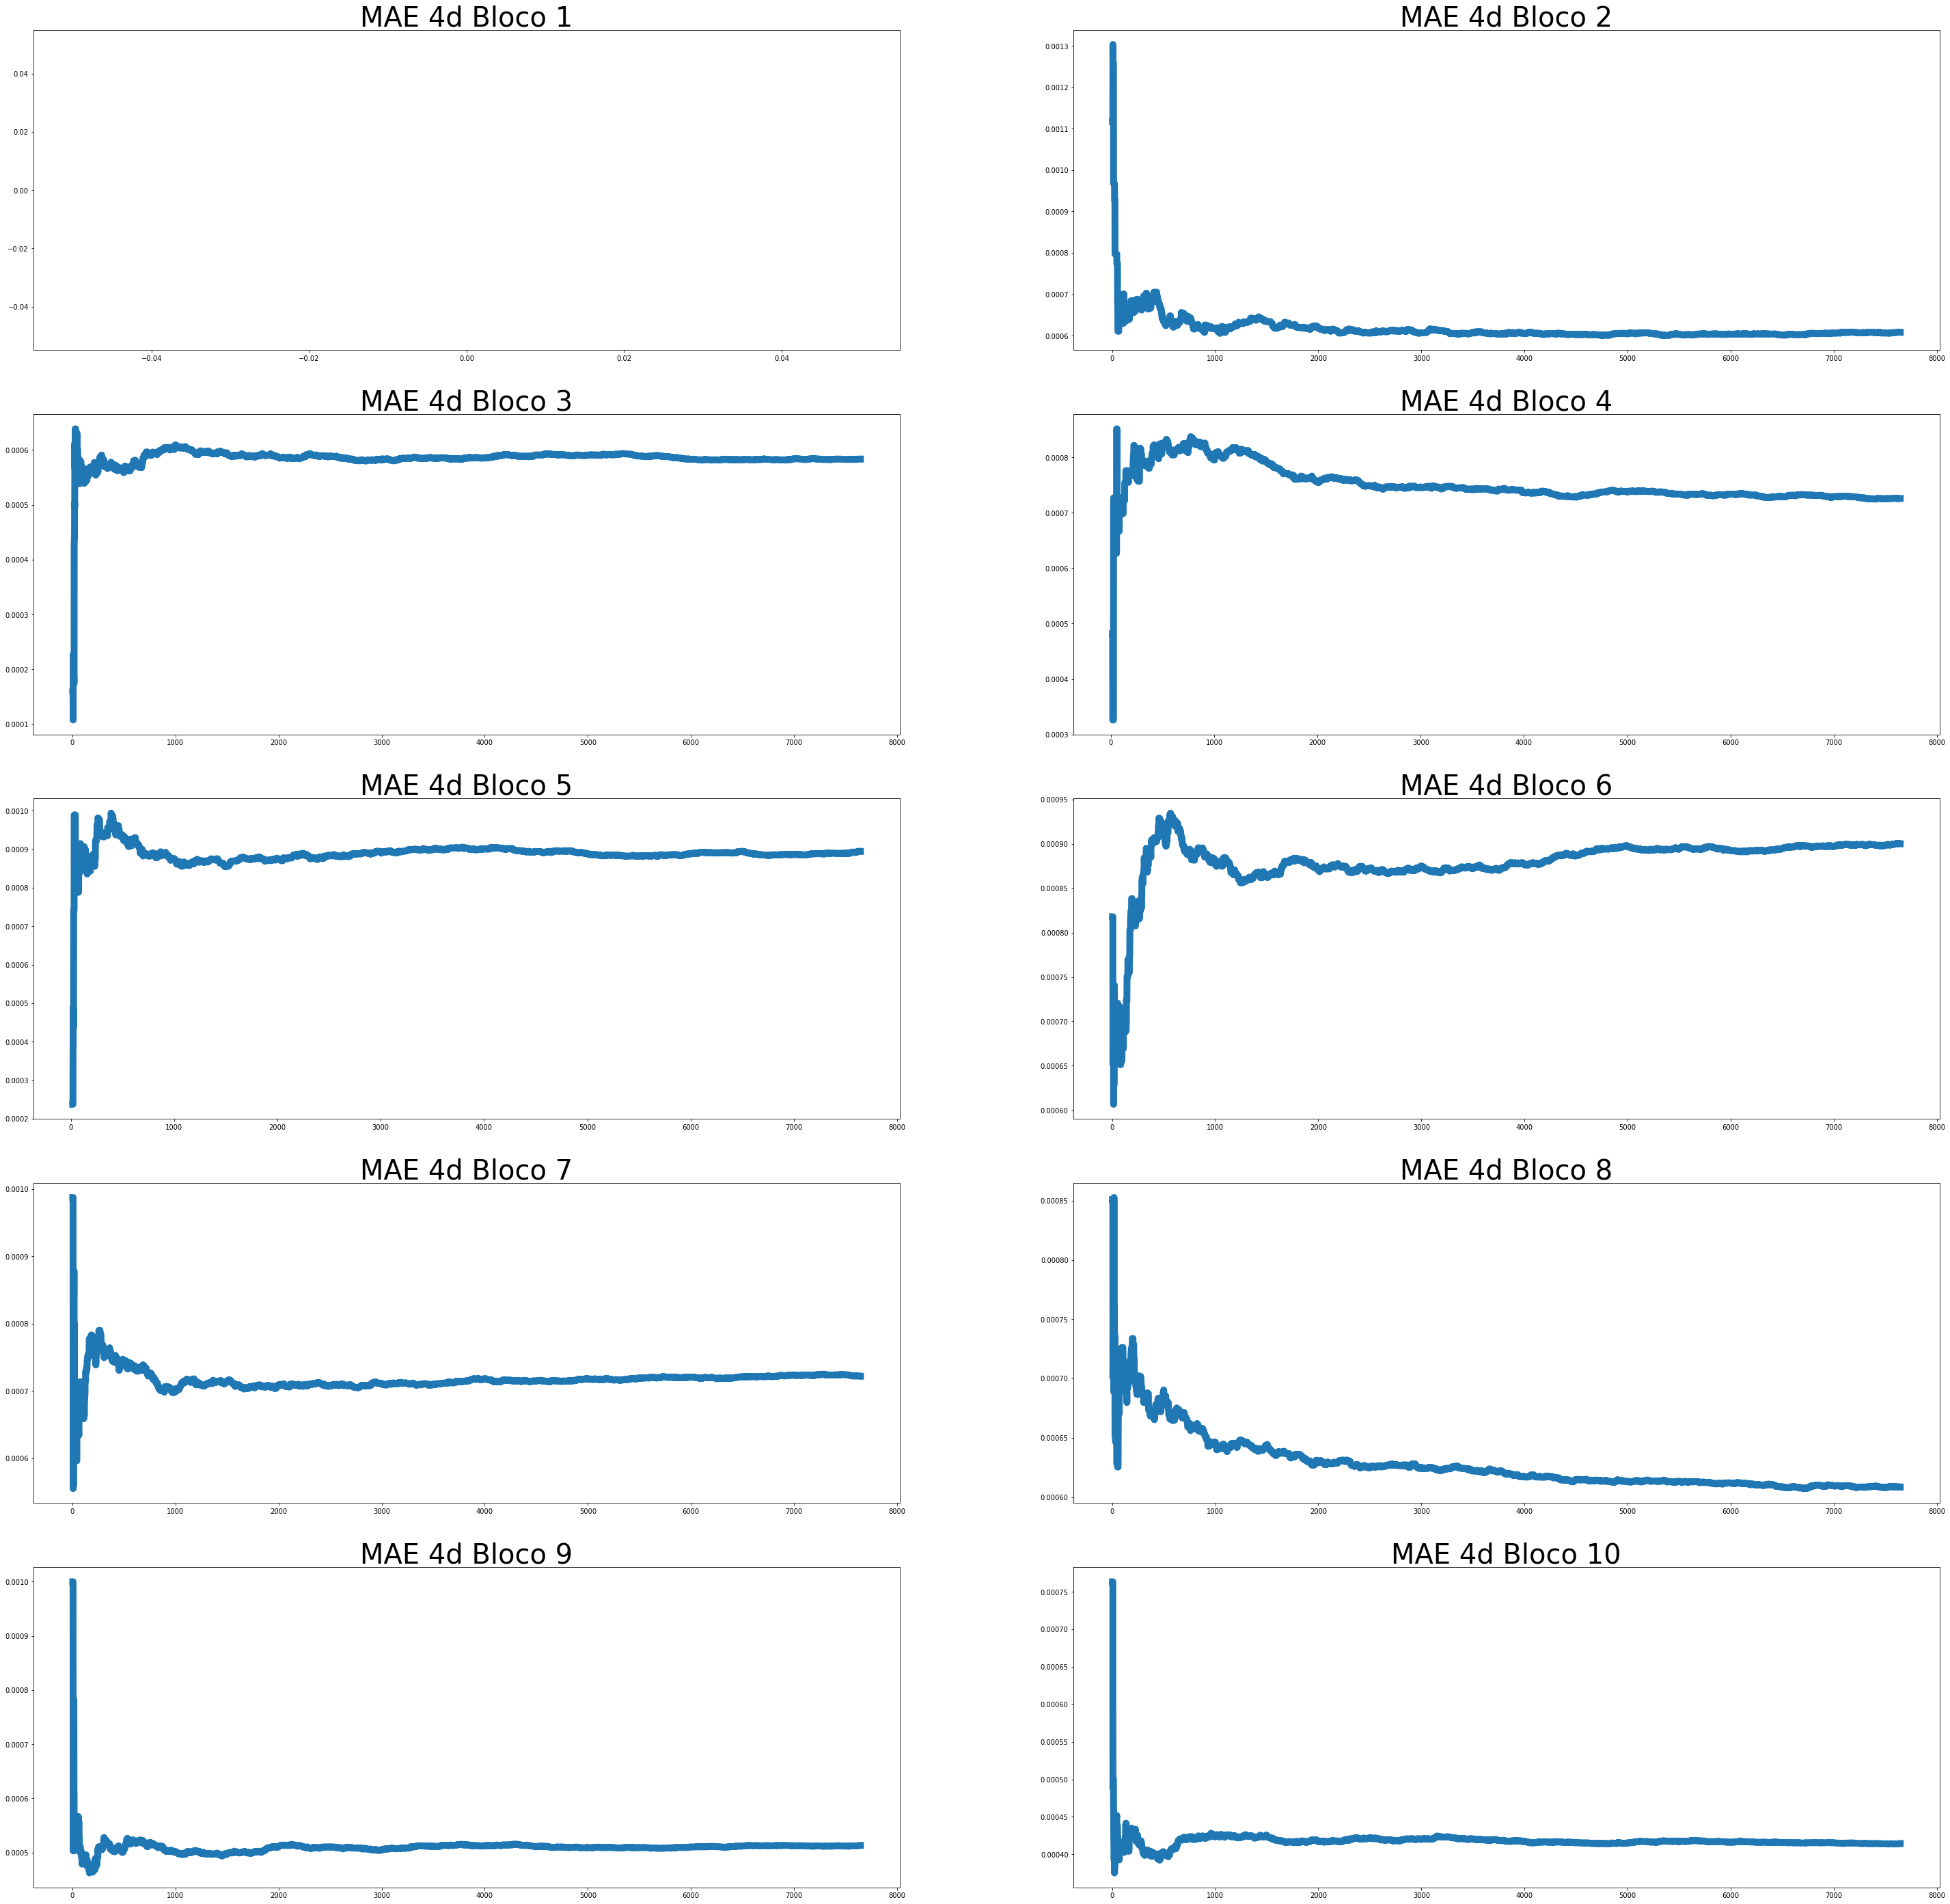

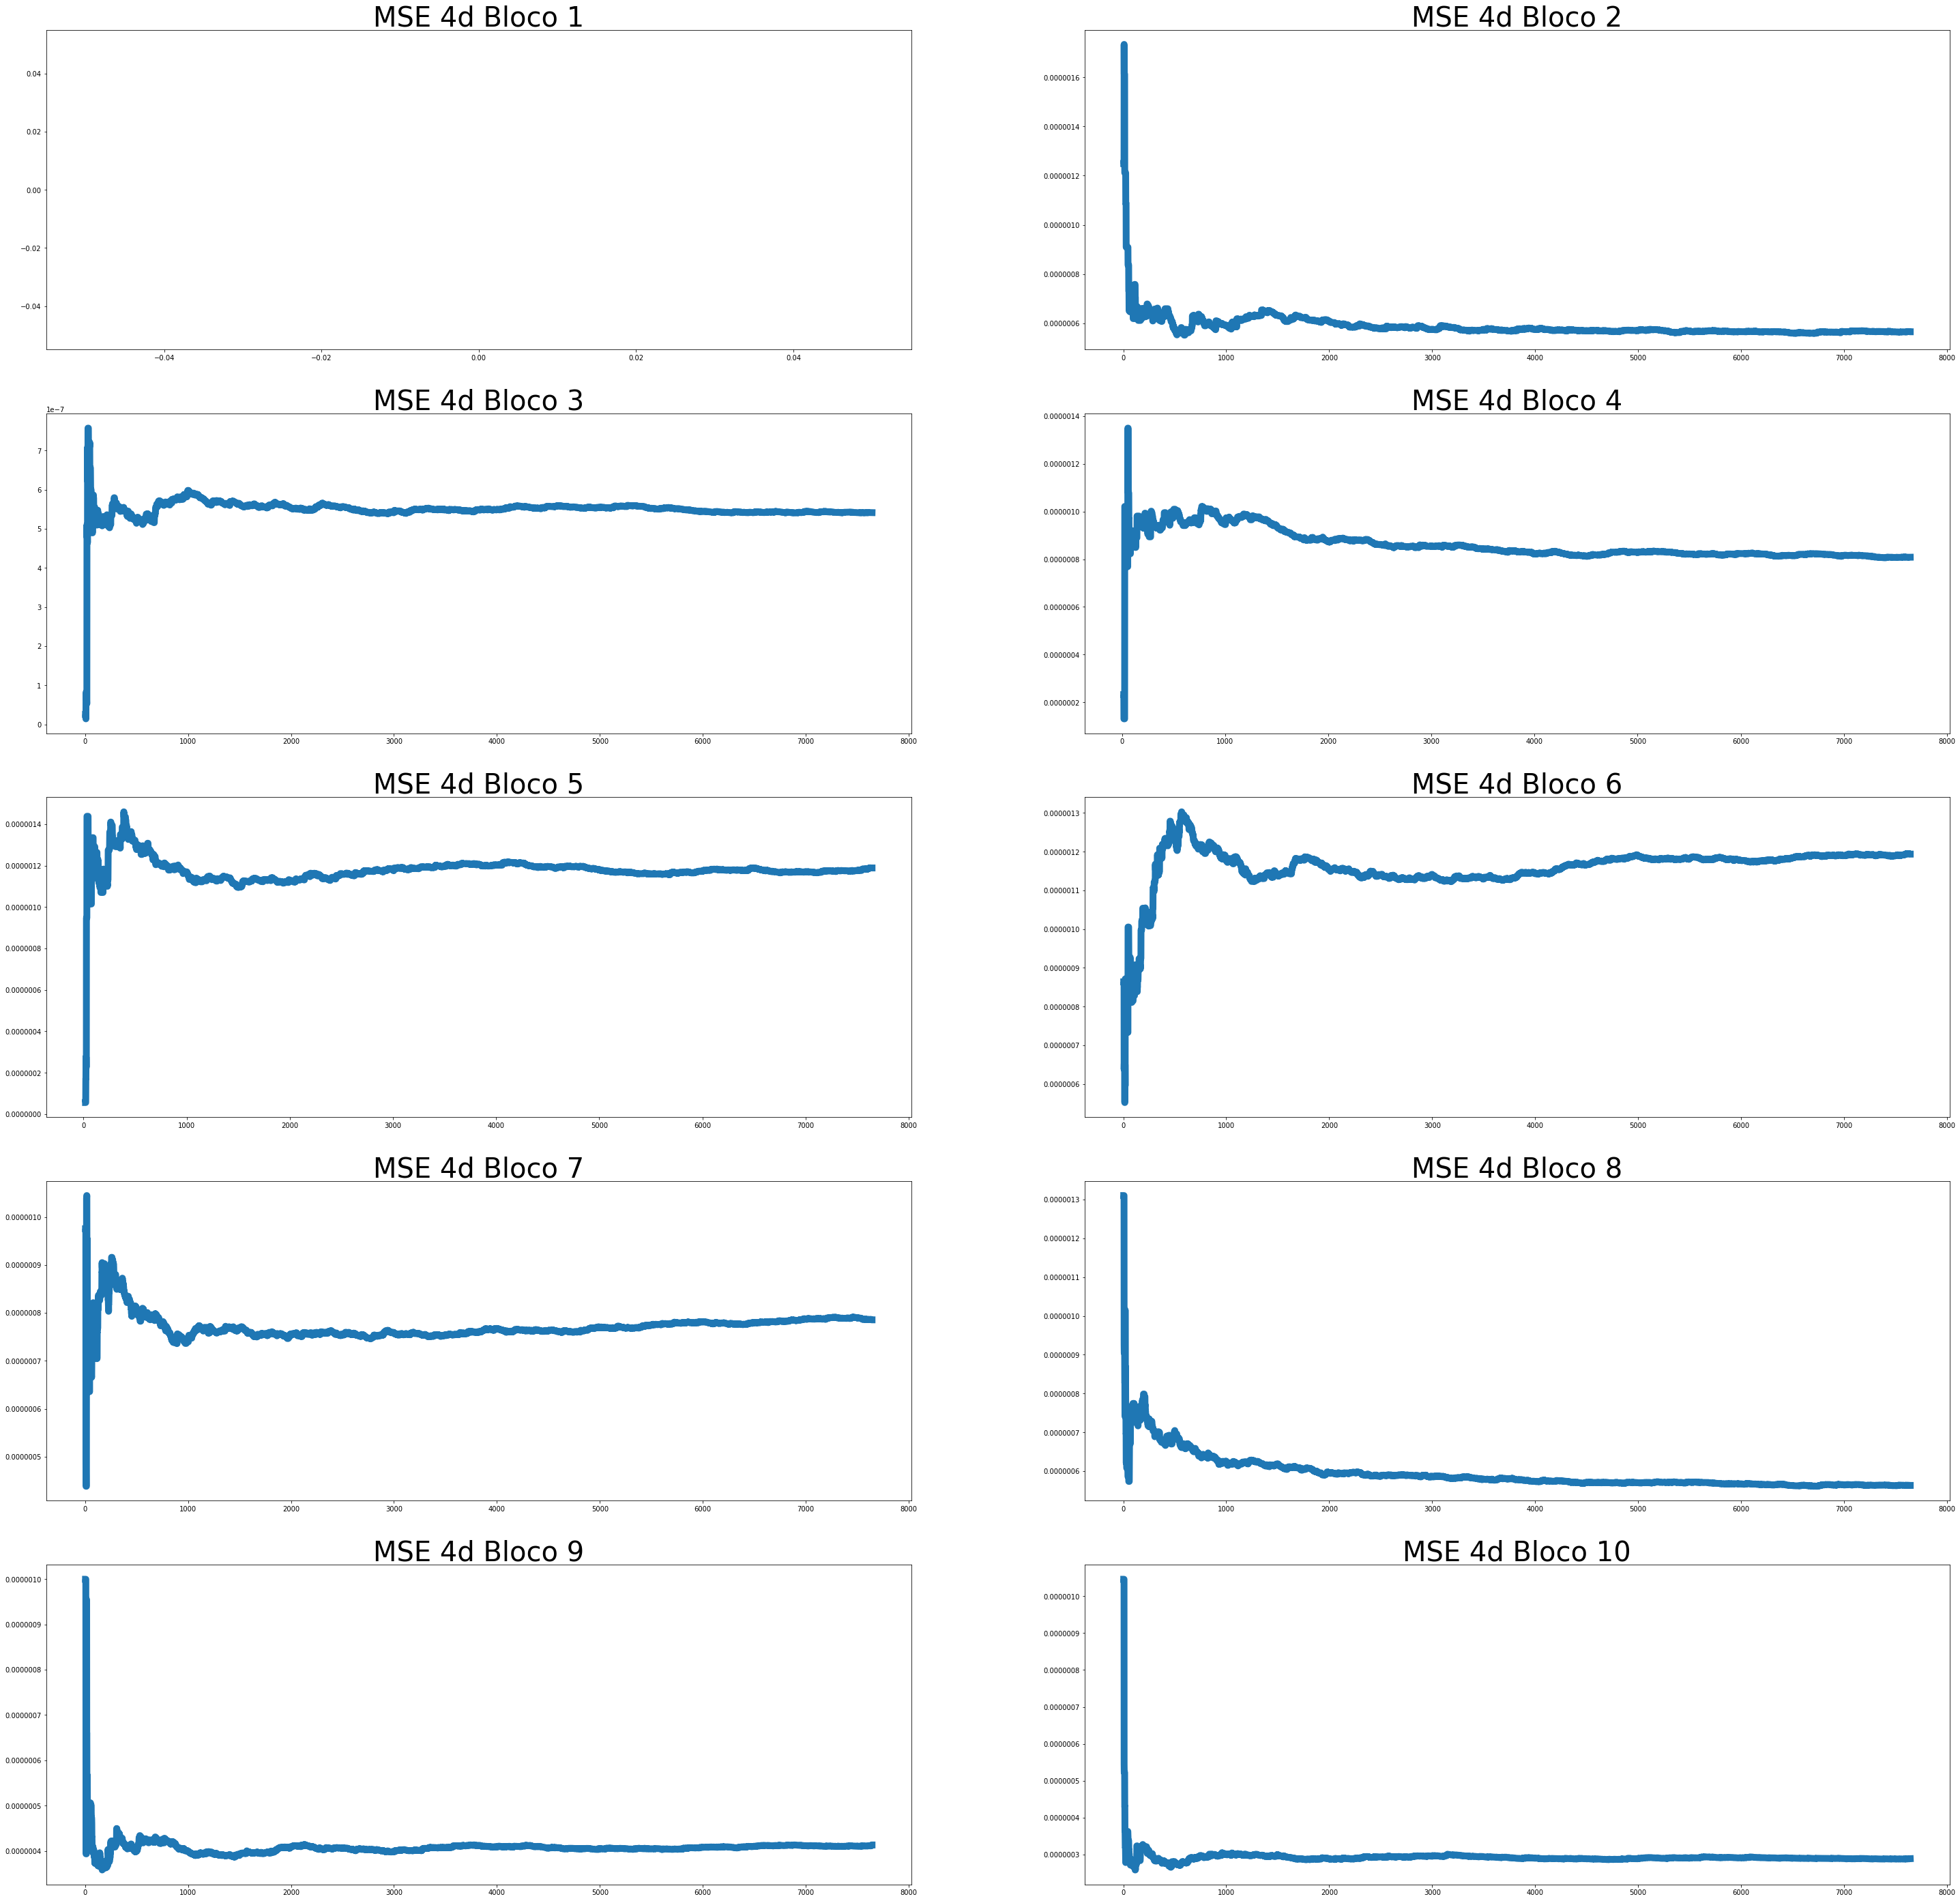

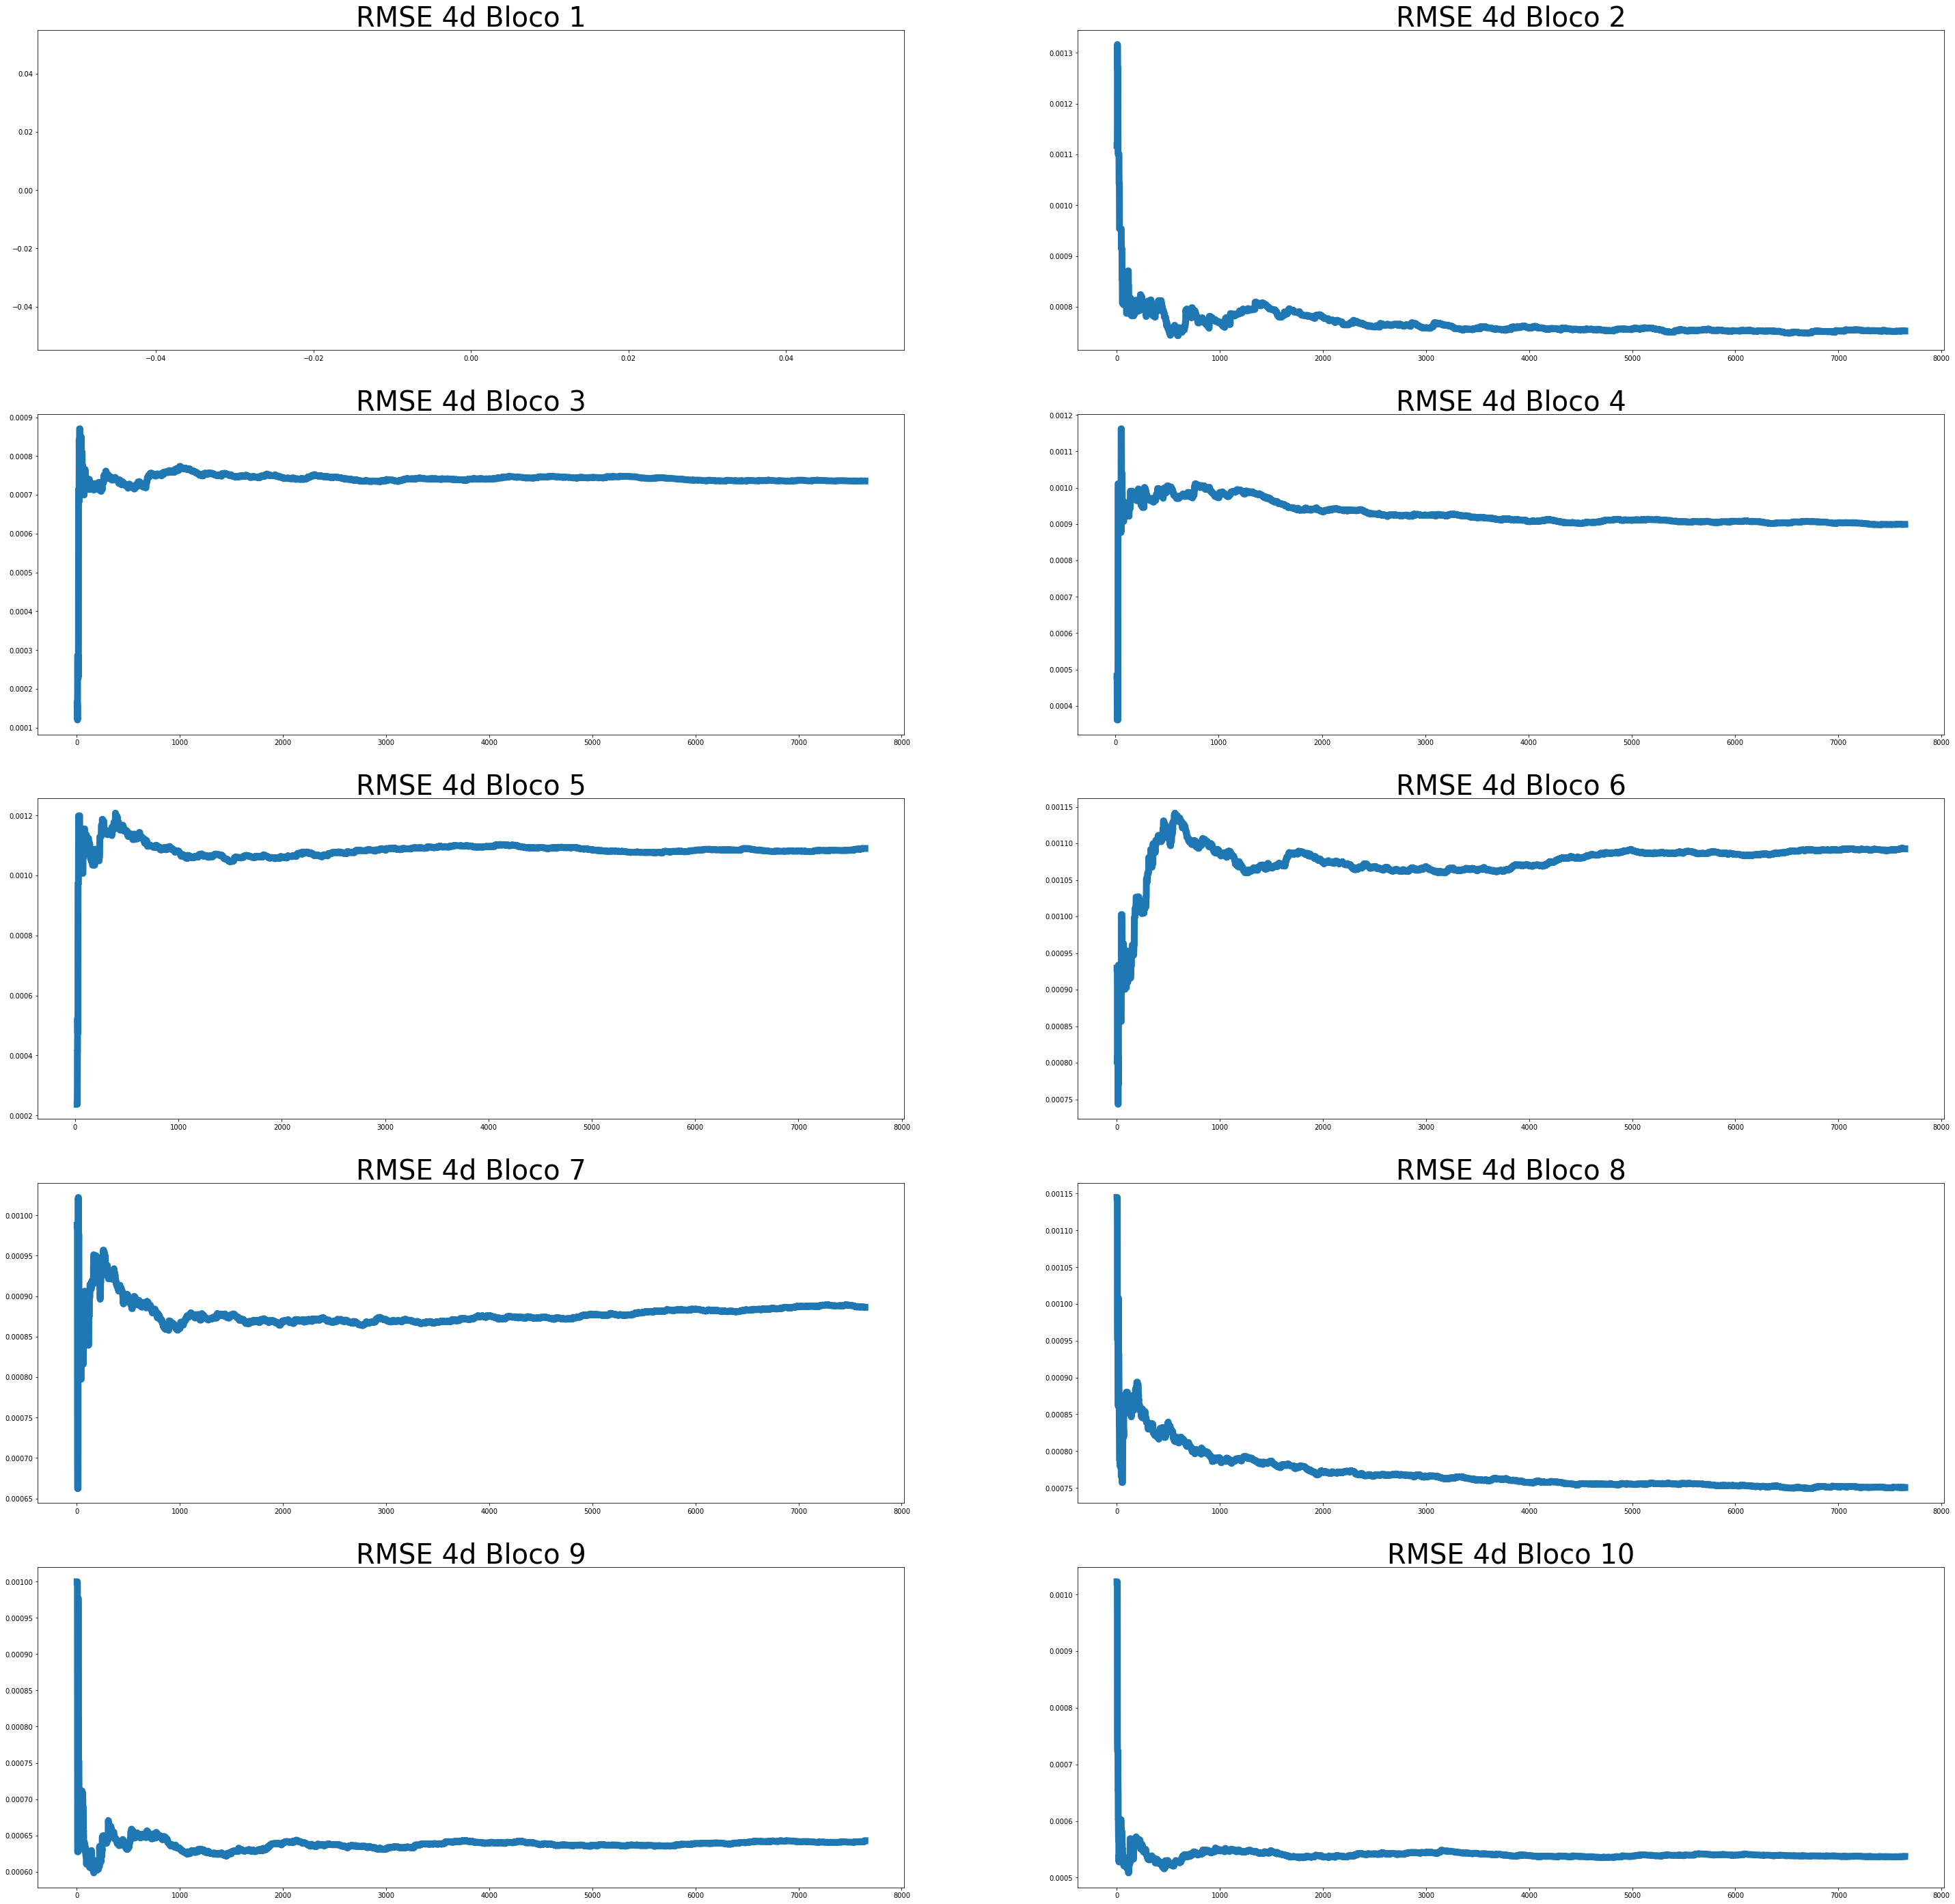

In [34]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



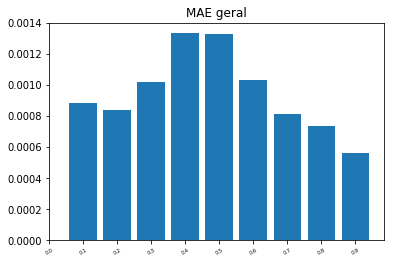

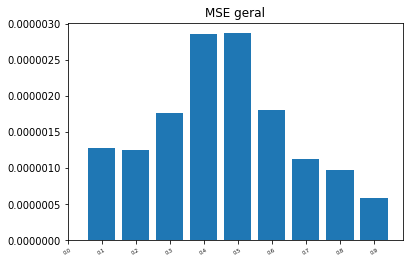

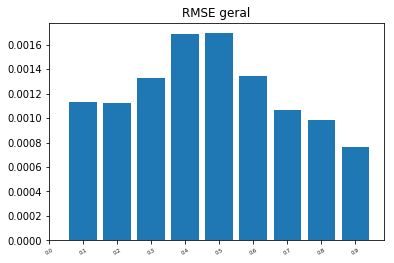


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



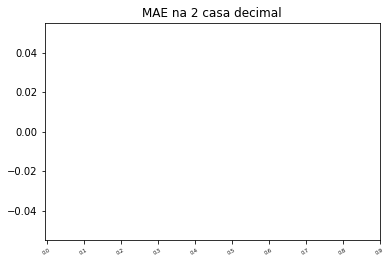

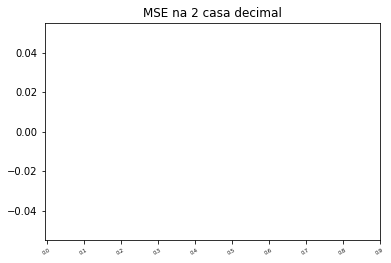

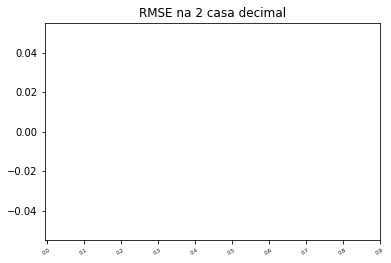


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



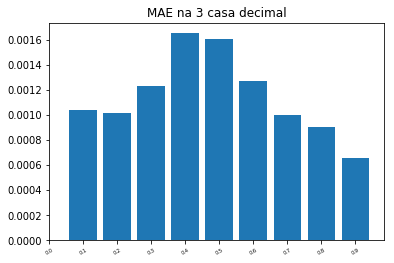

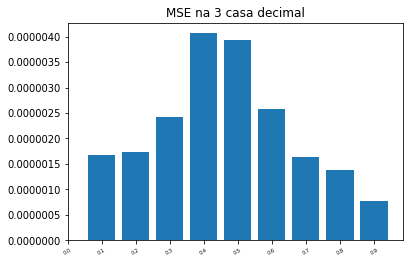

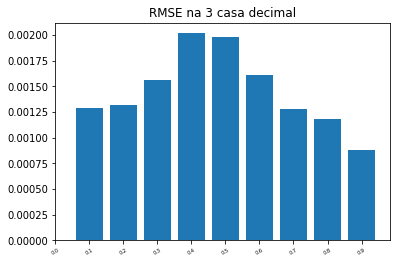


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



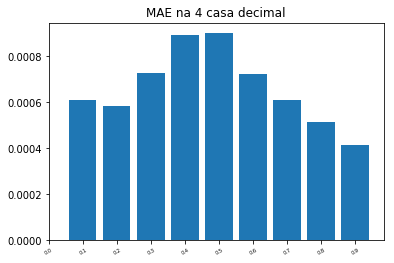

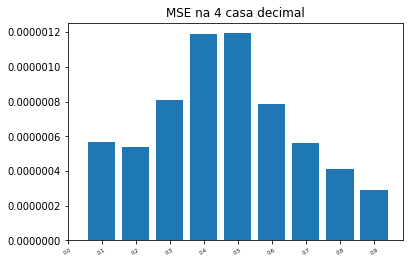

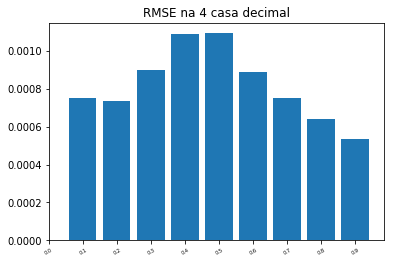

In [35]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
